<a href="https://colab.research.google.com/github/hby4290/COMP5625M/blob/main/COMP5625M_assessment2024_problem_(2)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## COMP5625M Practical Assessment - Deep Learning [100 Marks]


<div class="logos"><img src="Comp5625M_logo.jpg" width="220px" align="right"></div>

This assessment is divided into two parts:
> 1. Image classification using DNN and CNN [70 Marks]
> 2. Use of RNN to predict texts for image captioning [30 Marks]

The maximum number of marks for each part is shown in the section headers. As indicated in the main heading above, the overall assessment carries a maximum of 100 marks.

This summative assessment is weighted 50% of the final grade for the module.


### Motivation

Through this coursework, you will:

> 1. Understand and implement your first deep neural network and convolutional neural network (CNN) and see how these can be used for classification problem
> 2. Practice building, evaluating, and finetuning your CNN on an image dataset from development to testing stage.
> 3. You will learn to tackle overfitting problem using strategies such as data augmentation and drop out.
> 4. Compare your model performance and accuracy with others, such as the leaderboard on Kaggle
> 5. Use RNNs to predict the caption of an image from established word vocabularies
> 6. Understand and visualise text predictions for a given image.


### Setup and resources

You must work using this provided template notebook.

Having a GPU will speed up the training process. See the provided document on Minerva about setting up a working environment for various ways to access a GPU.

Please implement the coursework using **Python and PyTorch**, and refer to the notebooks and exercises provided.


### Submission

Please submit the following:

> 1. Your completed Jupyter notebook file, without removing anything in the template, in **.ipynb format.**
> 2. The **.html version** of your notebook; File > Download as > HTML (.html). Check that all cells have been run and all outputs (including all graphs you would like to be marked) displayed in the .html for marking.
> 3. Your selected image from section 2.4.2 "Failure analysis"

Final note:

> **Please display everything that you would like to be marked. Under each section, put the relevant code containing your solution. You may re-use functions you defined previously, but any new code must be in the relevant section.** Feel free to add as many code cells as you need under each section.


Your student username (for example, ```sc15jb```):

--> sc23b2h

Your full name:

--> Boyu Hu

### Part I: Image Classification [70 marks]

#### Dataset
This coursework will use a subset of images from Tiny ImageNet, which is a subset of the [ImageNet dataset](https://www.image-net.org/update-mar-11-2021.php). Our subset of Tiny ImageNet contains **30 different categories**, we will refer to it as TinyImageNet30. The training set has 450 resized images (64x64 pixels) for each category (13,500 images in total). You can download the training and test set from the Kaggle website:

>[Direct access of data is possible by clicking here, please use your university email to access this](https://leeds365-my.sharepoint.com/:u:/g/personal/scssali_leeds_ac_uk/ESF87mN6kelIkjdISkaRow8BublW27jB-P8eWV6Rr4rxtw?e=SPASDB)

>[To submit your results on the Kaggle competition. You can also access data here](https://www.kaggle.com/t/9105198471a3490d9057026d27d8a711)

To access the dataset, you will need an account on the Kaggle website. Even if you have an existing Kaggle account, please carefully adhere to these instructions, or we may not be able to locate your entries:

> 1. Use your **university email** to register a new account.
> 2. Set your **Kaggle account NAME** to your university username, for example, ``sc15jb`` (see the ``note`` below)

``Note:`` If the name is already taken in the Kaggle then please use a similar pseudo name and add a note in your submission with the name you have used in the Kaggle.

#### Submitting your test result to Kaggle leaderboard
The class Kaggle competition also includes a blind test set, which will be used in Question 1 for evaluating your custom model's performance on a test set. The competition website will compute the test set accuracy, as well as position your model on the class leaderboard. More information is provided in the related section below.


## Required packages

[1] [numpy](http://www.numpy.org) is package for scientific computing with python

[2] [h5py](http://www.h5py.org) is package to interact with compactly stored dataset

[3] [matplotlib](http://matplotlib.org) can be used for plotting graphs in python

[4] [pytorch](https://pytorch.org/docs/stable/index.html) is library widely used for bulding deep-learning frameworks

Feel free to add to this section as needed some examples for importing some libraries is provided for you below.

You may need to install these packages using [pip](https://pypi.org/project/opencv-python/) or [conda](https://anaconda.org/conda-forge/opencv).

In [ ]:
import cv2
import math

import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.hub import load_state_dict_from_url

from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# always check your version
print(torch.__version__)

1.10.2


One challenge of building a deep learning model is to choose an architecture that can learn the features in the dataset without being unnecessarily complex. The first part of the coursework involves building a CNN and training it on TinyImageNet30.

### **Overview of image classification:**

**1. Function implementation** [14 marks]

*   **1.1** PyTorch ```Dataset``` and ```DataLoader``` classes (4 marks)
*   **1.2** PyTorch ```Model``` class for a simple MLP model (4 marks)
*   **1.3** PyTorch ```Model``` class for a simple CNN model (6 marks)

**2. Model training** [30 marks]
*   **2.1** Training on TinyImageNet30 dataset (6 marks)
*   **2.2** Generating confusion matrices and ROC curves (6 marks)
*   **2.3** Strategies for tackling overfitting (18 marks)
    *   **2.3.1** Data augmentation
    *   **2.3.2** Dropout
    *   **2.3.3** Hyperparameter tuning (e.g. changing learning rate)
            
**3. Model testing** [10 marks]
*   **3.1**   Testing your final model in (2) on test set - code to do this (4 marks)
*   **3.2**   Uploading your result to Kaggle  (6 marks)

**4. Model Fine-tuning on CIFAR10 dataset** [16 marks]
*   **4.1** Fine-tuning your model (initialise your model with pretrained weights from (2)) (6 marks)
*   **4.2** Fine-tuning model with frozen base convolution layers (6 marks)
*   **4.3** Compare complete model retraining with pretrained weights and with frozen layers. Comment on what you observe. (4 marks)


<!-- **5. Model comparison** [16 marks]
*   **5.1**   Load pretrained AlexNet and finetune on TinyImageNet30 until model convergence (8 marks)
*   **5.2**   Compare the results of your model with pretrained AlexNet on the same validation set. Provide performance values (loss graph, confusion matrix, top-1 accuracy, execution time) (8 marks) -->
<!--
**6. Interpretation of results** (14 marks)
*   **6.1** Implement grad-CAM for your model and AlexNet (6 marks)
*   **6.2** Visualise and compare your results from your model and AlexNet (4 marks)
*   **6.3** Provide comment on (4 marks)
    - why the network predictions were correct or not correct in your predictions?
    - what can you do to improve your results further?

**7. Residual connection for deeper network** (9 marks)
*   **7.1** Implement a few residual layers in AlexNet and retrain on TinyImageNet30. You can change network size if you wish. (6 marks)
*   **7.2** Comment on why such connections are important and why this impacted your results in terms of loss and accuracy (if it did!) (3 marks)

**Quality of your report** (2 marks) -->


## 1 Function implementations [14 marks]


### 1.1 Dataset class (4 marks)

Write a PyTorch ```Dataset``` class (an example [here](https://www.askpython.com/python-modules/pytorch-custom-datasets) for reference) which loads the TinyImage30 dataset and ```DataLoaders``` for training and validation sets.

In [ ]:
# Imports
import os
from PIL import Image
from torch.utils.data import Dataset
from natsort import natsorted
from torchvision import datasets
from torchvision import transforms
# Define your own class LoadFromFolder
class LoadFromFolder(Dataset):
    def __init__(self, main_dir, transform):

        # Set the loading directory
        self.main_dir = main_dir
        self.transform = transform

        # List all images in folder and count them
        all_imgs = os.listdir(main_dir)
        self.total_imgs = natsorted(all_imgs)

In [ ]:
def __len__(self):
    # Return the previously computed number of images
    return len(self.total_imgs)

def __getitem__(self, idx):
    img_loc = os.path.join(self.main_dir, self.total_imgs[idx])

    # Use PIL for image loading
    image = Image.open(img_loc).convert("RGB")
    # Apply the transformations
    tensor_image = self.transform(image)
    return tensor_image

In [ ]:
from torchvision import transforms

# 定义transform
transform = transforms.Compose([
    transforms.ToTensor(), # 将图像转换为Tensor
])
# 在ImageFolder中使用定义好的transform
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

dataset = ImageFolder(root='H:/Deep Learning/comp5625M_data_assessment_1/train_set/train_set', transform=transform)
#dataloader = DataLoader(dataset)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, drop_last=False)

print(next(iter(dataloader))[0].shape)  # 打印第一个批次图像的形状

torch.Size([32, 3, 64, 64])


### 1.2 Define a MLP model class (4 marks)

<u>Create a new model class using a combination of:</u>
- Input Units
- Hidden Units
- Output Units
- Activation functions
- Loss function
- Optimiser

第一种，一个隐藏层的方法

In [ ]:
# TO COMPLETE
# define a MLP Model class
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
class MLPModel_1(nn.Module):
  def __init__(self, input_units, hidden_units, output_units):
    super(MLPModel_1, self).__init__()
    #define the first hidden Units
    self.hidden1 = nn.Linear(input_units, hidden_units)
    #define the activation functions
    self.activation = nn.ReLU()
    #define the output units
    self.output = nn.Linear(hidden_units, output_units)

  def forward(self, x):
    x = self.activation(self.hidden1(x))
    x = self.output(x)
    return x

In [ ]:
loss_function = nn.CrossEntropyLoss()
input_units = 64 * 64 * 3
hidden_units = 512
output_units = len(dataset.classes)
model = MLPModel_1(input_units, hidden_units, output_units)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
from tqdm import tqdm

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    progress_bar = tqdm(dataloader, desc=f'Epoch {epoch+1}/{num_epochs}')
    for data, target in progress_bar:
        # 展平图像数据
        data = data.view(data.size(0), -1)

        optimizer.zero_grad()
        output = model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        progress_bar.set_postfix(loss=total_loss/(progress_bar.n + 1))
    average_loss = total_loss / len(dataloader)
    print(f'Epoch {epoch+1}: Average Loss: {average_loss:.4f}')


Epoch 1/10: 100%|█████████████████████████████████████████████████████| 422/422 [00:31<00:00, 13.60it/s, loss=2.91]


Epoch 1: Average Loss: 2.9027


Epoch 2/10: 100%|█████████████████████████████████████████████████████| 422/422 [00:31<00:00, 13.35it/s, loss=2.82]


Epoch 2: Average Loss: 2.8132


Epoch 3/10: 100%|█████████████████████████████████████████████████████| 422/422 [00:32<00:00, 13.14it/s, loss=2.78]


Epoch 3: Average Loss: 2.7709


Epoch 4/10: 100%|█████████████████████████████████████████████████████| 422/422 [00:32<00:00, 12.99it/s, loss=2.74]


Epoch 4: Average Loss: 2.7296


Epoch 5/10: 100%|██████████████████████████████████████████████████████| 422/422 [00:33<00:00, 12.51it/s, loss=2.7]


Epoch 5: Average Loss: 2.6950


Epoch 6/10: 100%|█████████████████████████████████████████████████████| 422/422 [00:32<00:00, 12.81it/s, loss=2.68]


Epoch 6: Average Loss: 2.6699


Epoch 7/10: 100%|█████████████████████████████████████████████████████| 422/422 [00:32<00:00, 12.80it/s, loss=2.63]


Epoch 7: Average Loss: 2.6202


Epoch 8/10: 100%|██████████████████████████████████████████████████████| 422/422 [00:32<00:00, 12.86it/s, loss=2.6]


Epoch 8: Average Loss: 2.5894


Epoch 9/10: 100%|█████████████████████████████████████████████████████| 422/422 [00:33<00:00, 12.72it/s, loss=2.57]


Epoch 9: Average Loss: 2.5614


Epoch 10/10: 100%|████████████████████████████████████████████████████| 422/422 [00:33<00:00, 12.67it/s, loss=2.54]

Epoch 10: Average Loss: 2.5373


第二种，更复杂的MLP


In [ ]:
class MLPModel_2(nn.Module):
    def __init__(self, input_units, hidden_units1, hidden_units2, output_units):
        super(MLPModel_2, self).__init__()
        # 第一个隐藏层
        self.hidden1 = nn.Linear(input_units, hidden_units1)
        self.activation1 = nn.ReLU()

        # 第二个隐藏层
        self.hidden2 = nn.Linear(hidden_units1, hidden_units2)
        self.activation2 = nn.Sigmoid()

        # 输出层
        self.output = nn.Linear(hidden_units2, output_units)

    def forward(self, x):
        x = self.activation1(self.hidden1(x))
        x = self.activation2(self.hidden2(x))
        x = self.output(x)
        return x

In [ ]:
loss_function = nn.CrossEntropyLoss()
input_units = 64 * 64 * 3
hidden_units1 = 512
hidden_units2 = 256
output_units = len(dataset.classes)
model_MLP = MLPModel_2(input_units, hidden_units1, hidden_units2, output_units)
optimizer = optim.Adam(model_MLP.parameters(), lr=0.001)

In [ ]:
from tqdm import tqdm

num_epochs = 10

for epoch in range(num_epochs):
    model_MLP.train()
    total_loss = 0
    progress_bar = tqdm(dataloader, desc=f'Epoch {epoch+1}/{num_epochs}')
    for data, target in progress_bar:
        # 展平图像数据
        data = data.view(data.size(0), -1)

        optimizer.zero_grad()
        output = model_MLP(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        progress_bar.set_postfix(loss=total_loss/(progress_bar.n + 1))
    average_loss = total_loss / len(dataloader)
    print(f'Epoch {epoch+1}: Average Loss: {average_loss:.4f}')

Epoch 1/10: 100%|█████████████████████████████████████████████████████| 422/422 [01:29<00:00,  4.71it/s, loss=3.24]


Epoch 1: Average Loss: 3.2362


Epoch 2/10: 100%|█████████████████████████████████████████████████████| 422/422 [00:31<00:00, 13.27it/s, loss=3.01]


Epoch 2: Average Loss: 3.0026


Epoch 3/10: 100%|█████████████████████████████████████████████████████| 422/422 [00:30<00:00, 13.73it/s, loss=2.88]


Epoch 3: Average Loss: 2.8718


Epoch 4/10: 100%|██████████████████████████████████████████████████████| 422/422 [00:32<00:00, 13.06it/s, loss=2.8]


Epoch 4: Average Loss: 2.7920


Epoch 5/10: 100%|█████████████████████████████████████████████████████| 422/422 [00:33<00:00, 12.74it/s, loss=2.75]


Epoch 5: Average Loss: 2.7446


Epoch 6/10: 100%|██████████████████████████████████████████████████████| 422/422 [00:31<00:00, 13.21it/s, loss=2.7]


Epoch 6: Average Loss: 2.6972


Epoch 7/10: 100%|█████████████████████████████████████████████████████| 422/422 [00:32<00:00, 13.10it/s, loss=2.65]


Epoch 7: Average Loss: 2.6404


Epoch 8/10: 100%|██████████████████████████████████████████████████████| 422/422 [00:32<00:00, 12.96it/s, loss=2.6]


Epoch 8: Average Loss: 2.6018


Epoch 9/10: 100%|█████████████████████████████████████████████████████| 422/422 [00:33<00:00, 12.62it/s, loss=2.56]


Epoch 9: Average Loss: 2.5545


Epoch 10/10: 100%|████████████████████████████████████████████████████| 422/422 [00:34<00:00, 12.38it/s, loss=2.51]

Epoch 10: Average Loss: 2.5070


### 1.3 Define a CNN model class (6 marks)

<u>Create a new model class using a combination of:</u>
- Convolution layers
- Activation functions (e.g. ReLU)
- Maxpooling layers
- Fully connected layers
- Loss function
- Optimiser

*Please note that the network should be at least a few layers for the model to perform well.*

第一种，两层卷积

In [ ]:
# TO COMPLETE
# define a CNN Model class
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
class CNN_1(nn.Module):
  def __init__(self):
    super(CNN_1, self).__init__()
    #first Conv
    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
    self.relu = nn.ReLU()
    self.maxpool = nn.MaxPool2d(kernel_size=2)
    #second Conv
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
    #after twice pooling 64x64 image change 16x16, so this is the whole connection and import adjustment 64 * 16 * 16
    self.fc = nn.Linear(64 * 16 * 16, 30)

  def forward(self, x):
    #conv1 -> ReLU -> maxpool
    x = self.maxpool(self.relu(self.conv1(x)))
    #conv2 -> ReLU -> maxpool
    x = self.maxpool(self.relu(self.conv2(x)))
    x = x.view(-1, 64 * 16 * 16)
    x= self.fc(x)
    return x

In [ ]:
loss_function = nn.CrossEntropyLoss()

model = CNN_1()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
from tqdm import tqdm

num_epochs = 10

for epoch in range(num_epochs):
  model.train()
  total_loss = 0
  progress_bar = tqdm(enumerate(dataloader), total=len(dataloader), desc=f'Epoch {epoch+1}/{num_epochs}')

  for batch_idx, (data, target) in progress_bar:
    optimizer.zero_grad()
    output =model(data)
    loss = loss_function(output, target)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

    progress_bar.set_postfix({'loss': loss.item()})

  average_loss = total_loss /len(dataloader)
  print(f'Epoch {epoch+1} completed: Average Loss: {average_loss:.4f}')

Epoch 1/10: 100%|█████████████████████████████████████████████████████| 422/422 [04:56<00:00,  1.42it/s, loss=2.44]


Epoch 1 completed: Average Loss: 2.7506


Epoch 2/10: 100%|█████████████████████████████████████████████████████| 422/422 [00:48<00:00,  8.70it/s, loss=1.88]


Epoch 2 completed: Average Loss: 2.1545


Epoch 3/10: 100%|█████████████████████████████████████████████████████| 422/422 [00:49<00:00,  8.55it/s, loss=2.35]


Epoch 3 completed: Average Loss: 1.7835


Epoch 4/10: 100%|█████████████████████████████████████████████████████| 422/422 [00:49<00:00,  8.51it/s, loss=1.85]


Epoch 4 completed: Average Loss: 1.4603


Epoch 5/10: 100%|█████████████████████████████████████████████████████| 422/422 [00:49<00:00,  8.47it/s, loss=1.84]


Epoch 5 completed: Average Loss: 1.1800


Epoch 6/10: 100%|█████████████████████████████████████████████████████| 422/422 [00:50<00:00,  8.38it/s, loss=1.15]


Epoch 6 completed: Average Loss: 0.9174


Epoch 7/10: 100%|████████████████████████████████████████████████████| 422/422 [00:49<00:00,  8.49it/s, loss=0.597]


Epoch 7 completed: Average Loss: 0.6840


Epoch 8/10: 100%|█████████████████████████████████████████████████████| 422/422 [00:49<00:00,  8.48it/s, loss=0.66]


Epoch 8 completed: Average Loss: 0.4961


Epoch 9/10: 100%|████████████████████████████████████████████████████| 422/422 [00:49<00:00,  8.47it/s, loss=0.539]


Epoch 9 completed: Average Loss: 0.3477


Epoch 10/10: 100%|███████████████████████████████████████████████████| 422/422 [00:50<00:00,  8.43it/s, loss=0.226]

Epoch 10 completed: Average Loss: 0.2385


第二种，四层卷积

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class CNN_2(nn.Module):
  def __init__(self):
    super(CNN_2, self).__init__()
    #conv1
    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
    #conv2
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
    #maxpooling
    self.maxpool1 = nn.MaxPool2d(kernel_size=2)
    #conv3
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
    #conv4
    self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
    #maxpooling
    self.maxpool2 = nn.MaxPool2d(kernel_size=2)
    #Flatten layer for transitioning between conv layers and fully connected layers
    self.flatten = nn.Flatten()
    #fc -> 128*16*16
    self.fc1 = nn.Linear(128 * 8 * 8, 512)
    #fc -> 512
    self.fc2 = nn.Linear(512, 128)
    #output
    self.fc3 = nn.Linear(128, 30)
    #Activation
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.maxpool1(self.relu(self.conv1(x)))
    x = self.maxpool1(self.relu(self.conv2(x)))
    x = self.relu(self.conv3(x))
    x = self.maxpool2(self.relu(self.conv4(x)))
    x = self.flatten(x)
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [ ]:
loss_function = nn.CrossEntropyLoss()

model_CNN = CNN_2()
optimizer = optim.Adam(model_CNN.parameters(), lr=0.001)

In [ ]:
from tqdm import tqdm

num_epochs = 10

for epoch in range(num_epochs):
  model_CNN.train()
  total_loss = 0
  progress_bar = tqdm(enumerate(dataloader), total=len(dataloader), desc=f'Epoch {epoch+1}/{num_epochs}')

  for batch_idx, (data, target) in progress_bar:
    optimizer.zero_grad()
    output =model_CNN(data)
    loss = loss_function(output, target)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

    progress_bar.set_postfix({'loss': loss.item()})

  average_loss = total_loss /len(dataloader)
  print(f'Epoch {epoch+1} completed: Average Loss: {average_loss:.4f}')

Epoch 1/10: 100%|█████████████████████████████████████████████████████| 422/422 [01:33<00:00,  4.50it/s, loss=2.82]


Epoch 1 completed: Average Loss: 3.1247


Epoch 2/10: 100%|██████████████████████████████████████████████████████| 422/422 [01:35<00:00,  4.40it/s, loss=2.8]


Epoch 2 completed: Average Loss: 2.6939


Epoch 3/10: 100%|█████████████████████████████████████████████████████| 422/422 [01:34<00:00,  4.48it/s, loss=2.56]


Epoch 3 completed: Average Loss: 2.4024


Epoch 4/10: 100%|██████████████████████████████████████████████████████| 422/422 [01:36<00:00,  4.39it/s, loss=1.6]


Epoch 4 completed: Average Loss: 2.1363


Epoch 5/10: 100%|█████████████████████████████████████████████████████| 422/422 [01:34<00:00,  4.47it/s, loss=1.73]


Epoch 5 completed: Average Loss: 1.8871


Epoch 6/10: 100%|██████████████████████████████████████████████████████| 422/422 [01:34<00:00,  4.49it/s, loss=1.7]


Epoch 6 completed: Average Loss: 1.6554


Epoch 7/10: 100%|█████████████████████████████████████████████████████| 422/422 [01:30<00:00,  4.64it/s, loss=1.36]


Epoch 7 completed: Average Loss: 1.4211


Epoch 8/10: 100%|█████████████████████████████████████████████████████| 422/422 [01:29<00:00,  4.73it/s, loss=2.05]


Epoch 8 completed: Average Loss: 1.1756


Epoch 9/10: 100%|████████████████████████████████████████████████████| 422/422 [01:29<00:00,  4.70it/s, loss=0.897]


Epoch 9 completed: Average Loss: 0.9306


Epoch 10/10: 100%|███████████████████████████████████████████████████| 422/422 [01:29<00:00,  4.69it/s, loss=0.882]

Epoch 10 completed: Average Loss: 0.6891


## 2 Model training [30 marks]


### 2.1 Train both MLP and CNN model - show loss and accuracy graphs side by side (6 marks)

Train your model on the TinyImageNet30 dataset. Split the data into train and validation sets to determine when to stop training. Use seed at 0 for reproducibility and test_ratio=0.2 (validation data)

Display the graph of training and validation loss over epochs and accuracy over epochs to show how you determined the optimal number of training epochs. A top-*k* accuracy implementation is provided for you below.

> Please leave the graph clearly displayed. Please use the same graph to plot graphs for both train and validation.


In [ ]:
# (HelperDL function) -- Define top-*k* accuracy (**new**)
def topk_accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)
    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
from tqdm import tqdm

# 定义模型
class MLPModel_2(nn.Module):
    def __init__(self, input_units, hidden_units1, hidden_units2, output_units):
        super(MLPModel_2, self).__init__()
        self.hidden1 = nn.Linear(input_units, hidden_units1)
        self.activation1 = nn.ReLU()
        self.hidden2 = nn.Linear(hidden_units1, hidden_units2)
        self.activation2 = nn.Sigmoid()
        self.output = nn.Linear(hidden_units2, output_units)

    def forward(self, x):
        x = self.activation1(self.hidden1(x))
        x = self.activation2(self.hidden2(x))
        x = self.output(x)
        return x

# HelperDL function -- Define top-k accuracy
def topk_accuracy(output, target, topk=(1,)):
    maxk = max(topk)
    batch_size = target.size(0)
    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))
    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

# 数据预处理和加载
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])
dataset = ImageFolder(root='H:/Deep Learning/comp5625M_data_assessment_1/train_set/train_set', transform=transform)

# 拆分数据集
def create_data_loaders(dataset, test_ratio=0.2, batch_size=32, seed=0):
    torch.manual_seed(seed)
    val_size = int(len(dataset) * test_ratio)
    train_size = len(dataset) - val_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=True)
    return train_loader, val_loader

train_loader, val_loader = create_data_loaders(dataset, test_ratio=0.2, batch_size=32, seed=0)

# 实例化模型、损失函数和优化器
model_MLP = MLPModel_2(input_units=64*64*3, hidden_units1=512, hidden_units2=256, output_units=len(dataset.classes))
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_MLP.parameters(), lr=0.001)

# 训练和验证模型
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    model_MLP.train()
    total_loss, total_correct, total_samples = 0, 0, 0

    for data, target in tqdm(train_loader, desc=f'Training Epoch {epoch+1}/{num_epochs}'):
        data = data.view(data.size(0), -1)  # Flatten the images
        optimizer.zero_grad()
        output = model_MLP(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        accuracy_percent = topk_accuracy(output, target, topk=(1,))[0]
        total_correct += accuracy_percent * target.size(0) / 100.0   # 将百分比转换为样本数
        total_samples += target.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = total_correct / total_samples * 100
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    # Validation
    model_MLP.eval()
    val_loss, val_correct, val_samples = 0, 0, 0
    with torch.no_grad():
        for data, target in tqdm(val_loader, desc=f'Validation Epoch {epoch+1}/{num_epochs}'):
            data = data.view(data.size(0), -1)  # Flatten the images
            output = model_MLP(data)
            loss = loss_function(output, target)

            val_loss += loss.item()
            accuracy_percent = topk_accuracy(output, target, topk=(1,))[0]
            val_correct += accuracy_percent * target.size(0) / 100.0  # 将百分比转换为样本数
            val_samples += target.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = val_correct / val_samples * 100
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    print(f'Epoch {epoch+1}: Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')


Validation Epoch 1/10: 100%|███████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.75it/s]


Epoch 1: Train Loss: 3.3298, Train Accuracy: 7.08%, Val Loss: 3.2071, Val Accuracy: 9.97%


Validation Epoch 2/10: 100%|███████████████████████████████████████████████████████| 84/84 [00:01<00:00, 46.05it/s]


Epoch 2: Train Loss: 3.1240, Train Accuracy: 11.38%, Val Loss: 3.1262, Val Accuracy: 10.94%


Validation Epoch 3/10: 100%|███████████████████████████████████████████████████████| 84/84 [00:01<00:00, 45.68it/s]


Epoch 3: Train Loss: 2.9944, Train Accuracy: 13.91%, Val Loss: 2.9510, Val Accuracy: 15.33%


Validation Epoch 4/10: 100%|███████████████████████████████████████████████████████| 84/84 [00:01<00:00, 45.66it/s]


Epoch 4: Train Loss: 2.8910, Train Accuracy: 15.89%, Val Loss: 2.8905, Val Accuracy: 16.59%


Validation Epoch 5/10: 100%|███████████████████████████████████████████████████████| 84/84 [00:01<00:00, 45.31it/s]


Epoch 5: Train Loss: 2.8145, Train Accuracy: 18.54%, Val Loss: 2.8671, Val Accuracy: 17.52%


Validation Epoch 6/10: 100%|███████████████████████████████████████████████████████| 84/84 [00:01<00:00, 45.86it/s]


Epoch 6: Train Loss: 2.7557, Train Accuracy: 19.82%, Val Loss: 2.8386, Val Accuracy: 17.34%


Validation Epoch 7/10: 100%|███████████████████████████████████████████████████████| 84/84 [00:01<00:00, 46.20it/s]


Epoch 7: Train Loss: 2.6977, Train Accuracy: 21.80%, Val Loss: 2.8279, Val Accuracy: 18.34%


Validation Epoch 8/10: 100%|███████████████████████████████████████████████████████| 84/84 [00:01<00:00, 43.21it/s]


Epoch 8: Train Loss: 2.6494, Train Accuracy: 22.70%, Val Loss: 2.7815, Val Accuracy: 20.09%


Validation Epoch 9/10: 100%|███████████████████████████████████████████████████████| 84/84 [00:01<00:00, 46.44it/s]


Epoch 9: Train Loss: 2.5965, Train Accuracy: 24.61%, Val Loss: 2.8773, Val Accuracy: 18.42%


Validation Epoch 10/10: 100%|██████████████████████████████████████████████████████| 84/84 [00:01<00:00, 47.10it/s]

Epoch 10: Train Loss: 2.5526, Train Accuracy: 25.65%, Val Loss: 2.7636, Val Accuracy: 20.50%


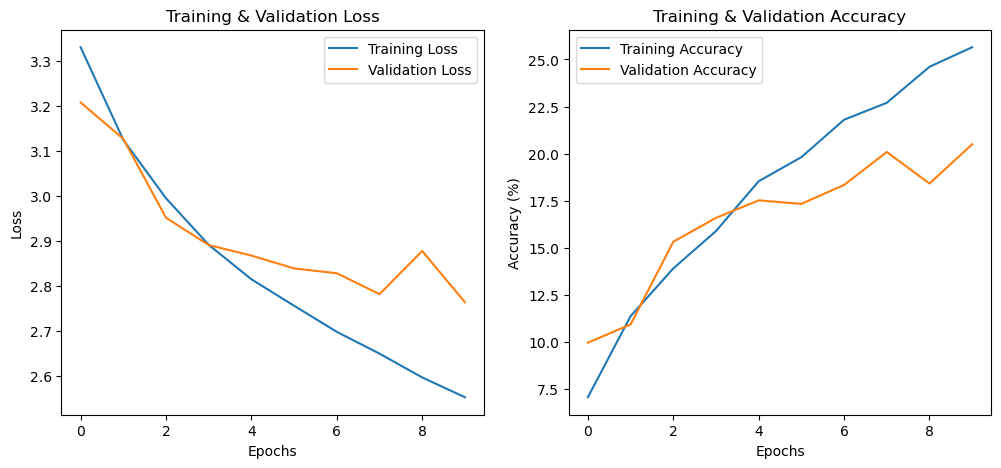

In [ ]:
# 绘制图表
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
from tqdm import tqdm

# CNN模型定义
class CNN_2(nn.Module):
  def __init__(self):
    super(CNN_2, self).__init__()
    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
    self.maxpool1 = nn.MaxPool2d(kernel_size=2)
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
    self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
    self.maxpool2 = nn.MaxPool2d(kernel_size=2)
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(128 * 8 * 8, 512)  # 根据前一层的输出调整尺寸
    self.fc2 = nn.Linear(512, 128)
    self.fc3 = nn.Linear(128, 30)  # 假设有30个类别
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.maxpool1(self.relu(self.conv1(x)))
    x = self.maxpool1(self.relu(self.conv2(x)))
    x = self.relu(self.conv3(x))
    x = self.maxpool2(self.relu(self.conv4(x)))
    x = self.flatten(x)
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.fc3(x)
    return x

# HelperDL function -- Define top-k accuracy
def topk_accuracy(output, target, topk=(1,)):
    maxk = max(topk)
    batch_size = target.size(0)
    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))
    res = []
    for k in topk:
        correct_k = correct[:k].contiguous().view(-1).float().sum(0, keepdim=True)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res[0].item()  # 返回top-1准确率

# 数据预处理和加载
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])
dataset = ImageFolder(root='H:/Deep Learning/comp5625M_data_assessment_1/train_set/train_set', transform=transform)

# 拆分数据集为训练集和验证集
def create_data_loaders(dataset, test_ratio=0.2, batch_size=32, seed=0):
    torch.manual_seed(seed)
    val_size = int(len(dataset) * test_ratio)
    train_size = len(dataset) - val_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=True)
    return train_loader, val_loader

train_loader, val_loader = create_data_loaders(dataset, test_ratio=0.2, batch_size=32, seed=0)

# 实例化模型、损失函数和优化器
model_CNN = CNN_2()
optimizer = optim.Adam(model_CNN.parameters(), lr=0.001)
loss_function = nn.CrossEntropyLoss()

# 训练和验证模型
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

num_epochs = 10

for epoch in range(num_epochs):
    model_CNN.train()
    total_loss, total_correct, total_samples = 0, 0, 0
    for batch_idx, (data, target) in tqdm(enumerate(train_loader), total=len(train_loader), desc=f'Epoch {epoch+1}/{num_epochs}'):
        optimizer.zero_grad()
        output = model_CNN(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        accuracy_percent = topk_accuracy(output, target, topk=(1,))
        total_correct += accuracy_percent / 100.0 * target.size(0)  # 将百分比转换为样本数
        total_samples += target.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = total_correct / total_samples * 100
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    # 验证过程
    model_CNN.eval()
    val_loss, val_correct, val_samples = 0, 0, 0
    with torch.no_grad():
        for data, target in tqdm(val_loader, desc=f'Validation Epoch {epoch+1}/{num_epochs}'):
            output = model_CNN(data)
            loss = loss_function(output, target)

            val_loss += loss.item()
            accuracy_percent = topk_accuracy(output, target, topk=(1,))
            val_correct += accuracy_percent / 100.0 * target.size(0)  # 将百分比转换为样本数
            val_samples += target.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = val_correct / val_samples * 100
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    print(f'Epoch {epoch+1}: Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

Validation Epoch 1/10: 100%|███████████████████████████████████████████████████████| 84/84 [00:07<00:00, 11.47it/s]


Epoch 1: Train Loss: 3.2636, Train Accuracy: 7.61%, Val Loss: 3.0349, Val Accuracy: 11.72%


Validation Epoch 2/10: 100%|███████████████████████████████████████████████████████| 84/84 [00:07<00:00, 11.71it/s]


Epoch 2: Train Loss: 2.9352, Train Accuracy: 15.62%, Val Loss: 2.7731, Val Accuracy: 20.94%


Validation Epoch 3/10: 100%|███████████████████████████████████████████████████████| 84/84 [00:07<00:00, 11.71it/s]


Epoch 3: Train Loss: 2.6033, Train Accuracy: 24.09%, Val Loss: 2.4801, Val Accuracy: 28.16%


Validation Epoch 4/10: 100%|███████████████████████████████████████████████████████| 84/84 [00:07<00:00, 11.71it/s]


Epoch 4: Train Loss: 2.3115, Train Accuracy: 32.33%, Val Loss: 2.3224, Val Accuracy: 32.66%


Validation Epoch 5/10: 100%|███████████████████████████████████████████████████████| 84/84 [00:07<00:00, 11.56it/s]


Epoch 5: Train Loss: 2.0707, Train Accuracy: 38.78%, Val Loss: 2.2231, Val Accuracy: 35.71%


Validation Epoch 6/10: 100%|███████████████████████████████████████████████████████| 84/84 [00:07<00:00, 11.63it/s]


Epoch 6: Train Loss: 1.8133, Train Accuracy: 45.42%, Val Loss: 2.2197, Val Accuracy: 37.69%


Validation Epoch 7/10: 100%|███████████████████████████████████████████████████████| 84/84 [00:07<00:00, 11.20it/s]


Epoch 7: Train Loss: 1.5387, Train Accuracy: 53.33%, Val Loss: 2.2535, Val Accuracy: 37.54%


Validation Epoch 8/10: 100%|███████████████████████████████████████████████████████| 84/84 [00:07<00:00, 11.62it/s]


Epoch 8: Train Loss: 1.2126, Train Accuracy: 62.82%, Val Loss: 2.4783, Val Accuracy: 37.35%


Validation Epoch 9/10: 100%|███████████████████████████████████████████████████████| 84/84 [00:07<00:00, 11.47it/s]


Epoch 9: Train Loss: 0.8895, Train Accuracy: 72.39%, Val Loss: 2.6263, Val Accuracy: 37.39%


Validation Epoch 10/10: 100%|██████████████████████████████████████████████████████| 84/84 [00:07<00:00, 11.27it/s]

Epoch 10: Train Loss: 0.6068, Train Accuracy: 80.61%, Val Loss: 3.2069, Val Accuracy: 37.09%


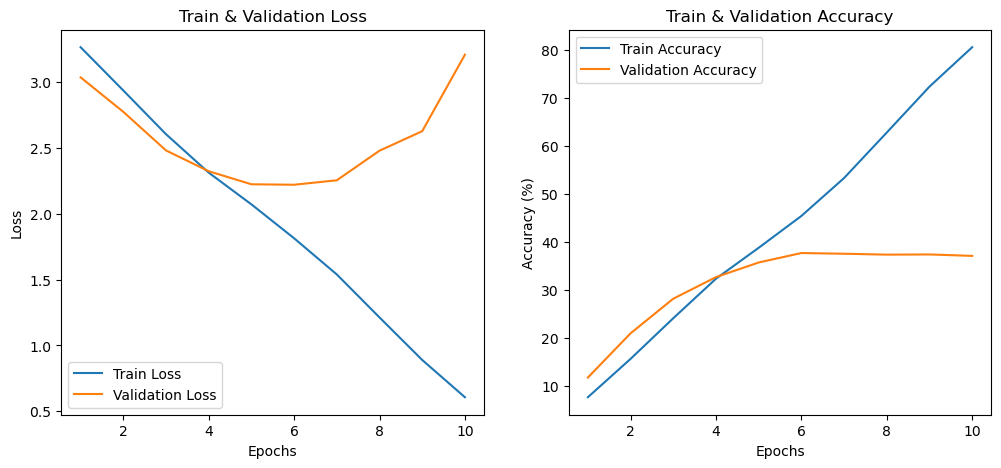

In [ ]:
import matplotlib.pyplot as plt

# 设置图形大小
plt.figure(figsize=(12, 5))

# 绘制训练和验证损失
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.title('Train & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 绘制训练和验证准确率
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs+1), val_accuracies, label='Validation Accuracy')
plt.title('Train & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()


> Comment on your model and the results you have obtained. This should include the number of parameters for each of your models and briefly explain why one should use CNN over MLP for the image classification problem.

### 2.2 Generating confusion matrix and ROC curves (6 marks)
- Use your CNN architecture with best accuracy to generate two confusion matrices, one for the training set and another for the validation set. Remember to use the whole validation and training sets, and to include all your relevant code. Display the confusion matrices in a meaningful way which clearly indicates what percentage of the data is represented in each position.
- Display an ROC curve for the two top and two bottom classes with area under the curve

In [ ]:
from torch.nn.functional import softmax

def predict_with_proba(model, data_loader):
    model.eval()
    all_probs = []
    all_preds = []
    actuals = []
    with torch.no_grad():
        for data, targets in tqdm(data_loader, desc='Predicting'):
            outputs = model(data)
            probs = softmax(outputs, dim=1)
            _, preds = torch.max(outputs, 1)
            all_probs.extend(probs.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            actuals.extend(targets.cpu().numpy())
    return actuals, all_preds, all_probs

# 使用新函数获取训练集和验证集的预测类别和概率
y_true_train, y_pred_train, y_probs_train = predict_with_proba(model_CNN, train_loader)
y_true_val, y_pred_val, y_probs_val = predict_with_proba(model_CNN, val_loader)

Predicting: 100%|██████████████████████████████████████████████████████████████████| 84/84 [00:07<00:00, 11.26it/s]


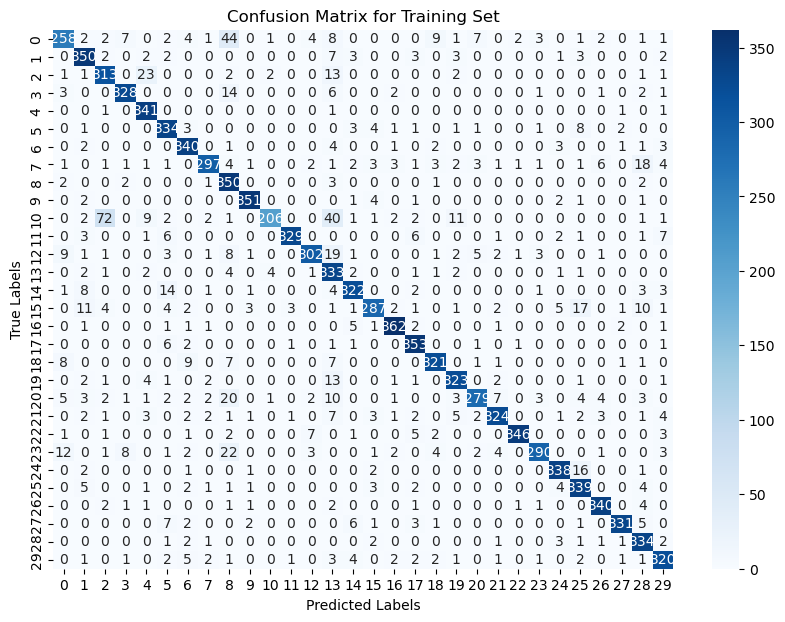

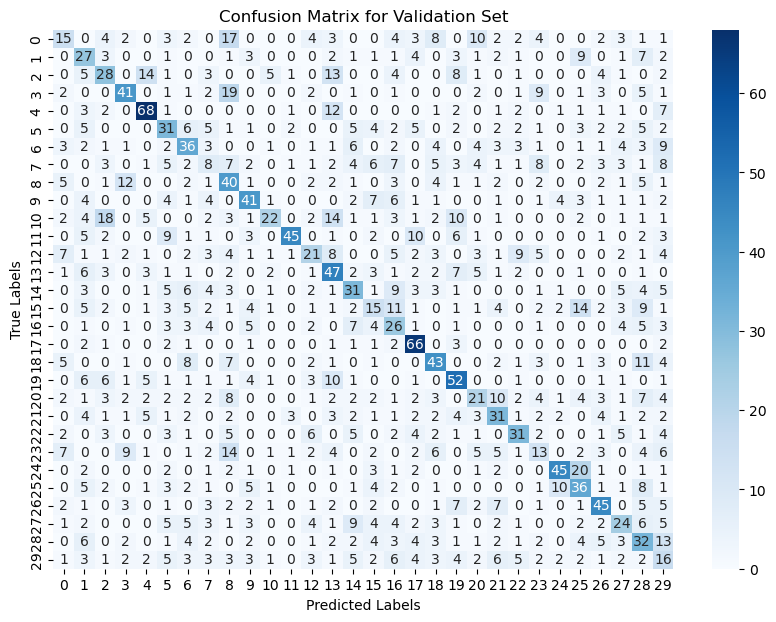

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 假设 y_true 和 y_pred 分别是你的真实标签和预测标签
cm_train = confusion_matrix(y_true_train, y_pred_train)
cm_val = confusion_matrix(y_true_val, y_pred_val)

# 使用Seaborn绘制混淆矩阵
plt.figure(figsize=(10,7))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Training Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

plt.figure(figsize=(10,7))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Validation Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

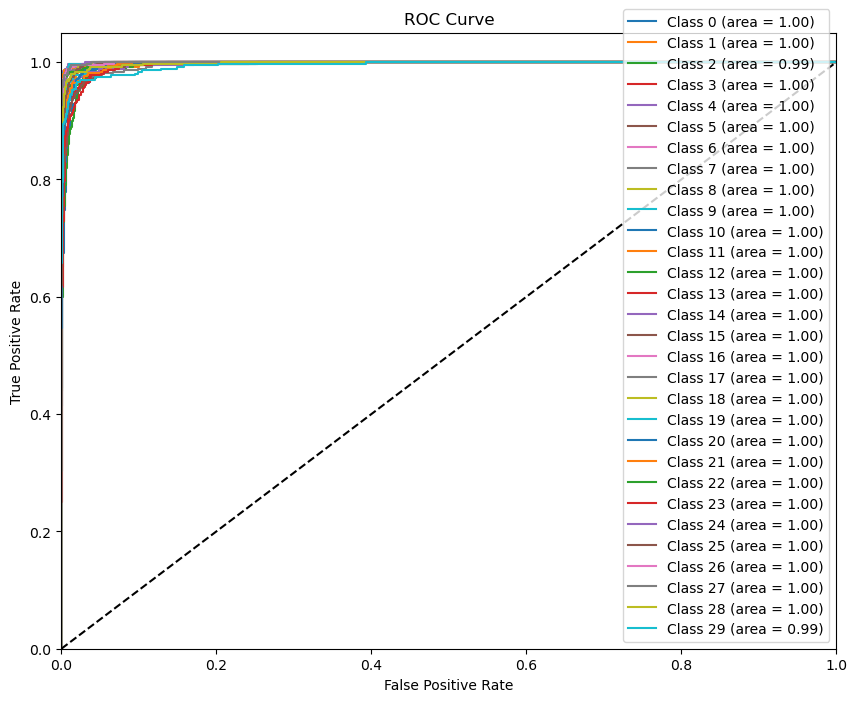

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

# 二值化标签
y_bin_train = label_binarize(y_true_train, classes=np.unique(y_true_train))
y_bin_val = label_binarize(y_true_val, classes=np.unique(y_true_val))

# 计算每个类别的ROC曲线和AUC
n_classes = y_bin_train.shape[1]

# 你需要将y_probs_train和y_probs_val转换为numpy数组，如果它们还不是
y_probs_train = np.array(y_probs_train)
y_probs_val = np.array(y_probs_val)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin_train[:, i], y_probs_train[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 绘制ROC曲线
# 这里仅展示如何绘制全部类别的ROC曲线，你需要根据需求选择特定的类别
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class {} (area = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Redesign your CNN model (optional)
> This is optional and does not carry any marks. Often to tackle model underfitting we tend to make more complex network design. Depending on your observation, you can improve your model if you wish.

In [ ]:
# Your code here (optional)

**Note: All questions below here relates to the CNN model only and not an MLP model! You are advised to use your final CNN model only for each of the questions below.**

### 2.3 Strategies for tackling overfitting (18 marks)
Using your (final) CNN model perform the strategies below to avoid overfitting problems. You can resuse the network weights from previous training, often referred to as ``fine tuning``.
*   **2.3.1** Data augmentation
*   **2.3.2** Dropout
*   **2.3.3** Hyperparameter tuning (e.g. changing learning rate)

> Plot loss and accuracy graphs per epoch side by side for each implemented strategy.

#### 2.3.1 Data augmentation (6 marks)

> Implement at least five different data augmentation techniques that should include both photometric and geometric augmentations.

> Provide graphs and comment on what you observe.


In [ ]:
# Your code here!
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# 定义数据增强技术
data_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # 随机水平翻转
    transforms.RandomRotation(10),  # 在(-10, 10)度内随机旋转
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # 随机调整亮度、对比度和饱和度
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # 随机平移
    transforms.RandomResizedCrop(64, scale=(0.8, 1.0)),  # 随机裁剪然后调整大小
    transforms.ToTensor(),  # 转换为Tensor
])

# 应用数据增强并加载数据集
augmented_dataset = datasets.ImageFolder(root='H:/Deep Learning/comp5625M_data_assessment_1/train_set/train_set', transform=data_transforms)

# 拆分数据集为训练集和验证集
train_size = int(0.8 * len(augmented_dataset))
val_size = len(augmented_dataset) - train_size
train_dataset, val_dataset = random_split(augmented_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, drop_last=True)

for epoch in range(num_epochs):
    model_CNN.train()
    total_loss = 0
    for data, target in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}'):
        optimizer.zero_grad()
        output = model_CNN(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f'Epoch {epoch+1}: Average Loss: {total_loss / len(train_loader):.4f}')



Epoch 1/10: 100%|████████████████████████████████████████████████████████████████| 337/337 [01:23<00:00,  4.05it/s]


Epoch 1: Average Loss: 3.7643


Epoch 2/10: 100%|████████████████████████████████████████████████████████████████| 337/337 [01:27<00:00,  3.87it/s]


Epoch 2: Average Loss: 3.7364


Epoch 3/10: 100%|████████████████████████████████████████████████████████████████| 337/337 [01:33<00:00,  3.59it/s]


Epoch 3: Average Loss: 3.7561


Epoch 4/10: 100%|████████████████████████████████████████████████████████████████| 337/337 [01:33<00:00,  3.60it/s]


Epoch 4: Average Loss: 3.7421


Epoch 5/10: 100%|████████████████████████████████████████████████████████████████| 337/337 [01:32<00:00,  3.63it/s]


Epoch 5: Average Loss: 3.7084


Epoch 6/10: 100%|████████████████████████████████████████████████████████████████| 337/337 [01:34<00:00,  3.57it/s]


Epoch 6: Average Loss: 3.7828


Epoch 7/10: 100%|████████████████████████████████████████████████████████████████| 337/337 [01:31<00:00,  3.70it/s]


Epoch 7: Average Loss: 3.7165


Epoch 8/10: 100%|████████████████████████████████████████████████████████████████| 337/337 [01:27<00:00,  3.85it/s]


Epoch 8: Average Loss: 3.7590


Epoch 9/10: 100%|████████████████████████████████████████████████████████████████| 337/337 [01:27<00:00,  3.84it/s]


Epoch 9: Average Loss: 3.7231


Epoch 10/10: 100%|███████████████████████████████████████████████████████████████| 337/337 [01:27<00:00,  3.86it/s]

Epoch 10: Average Loss: 3.8144


In [ ]:
# Your code here!
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# 定义数据增强技术
data_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # 随机水平翻转
    transforms.RandomRotation(10),  # 在(-10, 10)度内随机旋转
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # 随机调整亮度、对比度和饱和度
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # 随机平移
    transforms.RandomResizedCrop(64, scale=(0.8, 1.0)),  # 随机裁剪然后调整大小
    transforms.ToTensor(),  # 转换为Tensor
])

# 应用数据增强并加载数据集
augmented_dataset = datasets.ImageFolder(root='H:/Deep Learning/comp5625M_data_assessment_1/train_set/train_set', transform=data_transforms)

# 拆分数据集为训练集和验证集
train_size = int(0.8 * len(augmented_dataset))
val_size = len(augmented_dataset) - train_size
train_dataset, val_dataset = random_split(augmented_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, drop_last=True)

from tqdm import tqdm

# 训练模型
num_epochs = 10
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model_CNN.train()
    total_train_loss = 0
    total_train_correct = 0
    total_train_samples = 0

    # 包装train_loader迭代器以显示进度条
    for data, target in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Training'):
        optimizer.zero_grad()
        output = model_CNN(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        total_train_correct += (output.argmax(1) == target).type(torch.float).sum().item()
        total_train_samples += target.size(0)

    train_losses.append(total_train_loss / len(train_loader))
    train_accuracies.append((total_train_correct / total_train_samples) * 100)

    # 验证过程
    model_CNN.eval()
    total_val_loss = 0
    total_val_correct = 0
    total_val_samples = 0

    # 包装val_loader迭代器以显示进度条
    with torch.no_grad():
        for data, target in tqdm(val_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Validation'):
            output = model_CNN(data)
            loss = loss_function(output, target)

            total_val_loss += loss.item()
            total_val_correct += (output.argmax(1) == target).type(torch.float).sum().item()
            total_val_samples += target.size(0)

    val_losses.append(total_val_loss / len(val_loader))
    val_accuracies.append((total_val_correct / total_val_samples) * 100)

    print(f'Epoch {epoch+1}: Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.2f}%, '
          f'Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracies[-1]:.2f}%')

Epoch 1/10 - Validation: 100%|█████████████████████████████████████████████████████| 84/84 [00:09<00:00,  8.75it/s]


Epoch 1: Train Loss: 3.0666, Train Accuracy: 12.34%, Val Loss: 2.8482, Val Accuracy: 15.66%


Epoch 2/10 - Validation: 100%|█████████████████████████████████████████████████████| 84/84 [00:09<00:00,  8.93it/s]


Epoch 2: Train Loss: 2.8181, Train Accuracy: 17.99%, Val Loss: 2.7074, Val Accuracy: 20.46%


Epoch 3/10 - Validation: 100%|█████████████████████████████████████████████████████| 84/84 [00:09<00:00,  8.94it/s]


Epoch 3: Train Loss: 2.6354, Train Accuracy: 22.89%, Val Loss: 2.5430, Val Accuracy: 25.15%


Epoch 4/10 - Validation: 100%|█████████████████████████████████████████████████████| 84/84 [00:09<00:00,  8.91it/s]


Epoch 4: Train Loss: 2.4920, Train Accuracy: 26.72%, Val Loss: 2.4314, Val Accuracy: 28.91%


Epoch 5/10 - Validation: 100%|█████████████████████████████████████████████████████| 84/84 [00:09<00:00,  9.25it/s]


Epoch 5: Train Loss: 2.3642, Train Accuracy: 30.71%, Val Loss: 2.3613, Val Accuracy: 31.99%


Epoch 6/10 - Validation: 100%|█████████████████████████████████████████████████████| 84/84 [00:09<00:00,  9.20it/s]


Epoch 6: Train Loss: 2.2800, Train Accuracy: 33.44%, Val Loss: 2.3308, Val Accuracy: 32.29%


Epoch 7/10 - Validation: 100%|█████████████████████████████████████████████████████| 84/84 [00:09<00:00,  9.10it/s]


Epoch 7: Train Loss: 2.1545, Train Accuracy: 37.29%, Val Loss: 2.1502, Val Accuracy: 36.94%


Epoch 8/10 - Validation: 100%|█████████████████████████████████████████████████████| 84/84 [00:09<00:00,  9.11it/s]


Epoch 8: Train Loss: 2.0718, Train Accuracy: 39.28%, Val Loss: 2.1129, Val Accuracy: 38.10%


Epoch 9/10 - Validation: 100%|█████████████████████████████████████████████████████| 84/84 [00:10<00:00,  8.38it/s]


Epoch 9: Train Loss: 2.0188, Train Accuracy: 40.48%, Val Loss: 2.0761, Val Accuracy: 39.55%


Epoch 10/10 - Validation: 100%|████████████████████████████████████████████████████| 84/84 [00:10<00:00,  8.31it/s]

Epoch 10: Train Loss: 1.9386, Train Accuracy: 43.30%, Val Loss: 2.0356, Val Accuracy: 39.92%


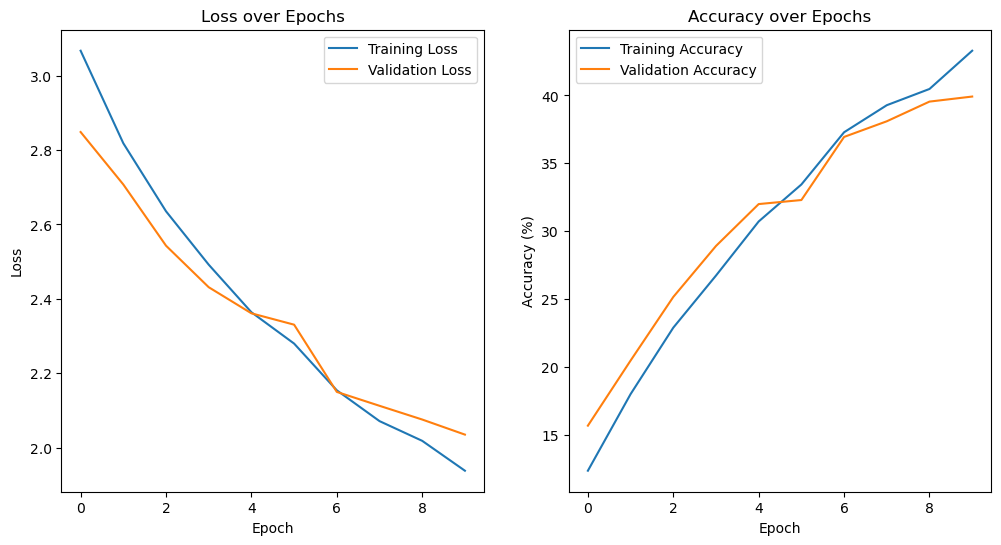

In [ ]:
# 绘制训练和验证的损失及准确率图
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

#### 2.3.2 Dropout (6 marks)

> Implement dropout in your model

> Provide graphs and comment on your choice of proportion used.

In [ ]:
# Your code here!
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class CNN_2(nn.Module):
  def __init__(self):
    super(CNN_2, self).__init__()
    #conv1
    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
    #conv2
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
    #maxpooling
    self.maxpool1 = nn.MaxPool2d(kernel_size=2)
    #conv3
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
    #conv4
    self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
    #maxpooling
    self.maxpool2 = nn.MaxPool2d(kernel_size=2)
    #Flatten layer for transitioning between conv layers and fully connected layers
    self.flatten = nn.Flatten()

    #fc -> 128*16*16
    self.fc1 = nn.Linear(128 * 8 * 8, 512)
    #Dropout layer
    self.dropout1 = nn.Dropout(0.5)
    #fc -> 512
    self.fc2 = nn.Linear(512, 128)
    #Dropout layer
    self.dropout2 = nn.Dropout(0.5)
    #output
    self.fc3 = nn.Linear(128, 30)
    #Activation
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.maxpool1(self.relu(self.conv1(x)))
    x = self.maxpool1(self.relu(self.conv2(x)))
    x = self.relu(self.conv3(x))
    x = self.maxpool2(self.relu(self.conv4(x)))
    x = self.flatten(x)
    x = self.dropout1(self.relu(self.fc1(x)))
    x = self.dropout2(self.relu(self.fc2(x)))
    x = self.fc3(x)
    return x

# 定义数据增强技术
data_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # 随机水平翻转
    transforms.RandomRotation(10),  # 在(-10, 10)度内随机旋转
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # 随机调整亮度、对比度和饱和度
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # 随机平移
    transforms.RandomResizedCrop(64, scale=(0.8, 1.0)),  # 随机裁剪然后调整大小
    transforms.ToTensor(),  # 转换为Tensor
])

# 应用数据增强并加载数据集
augmented_dataset = datasets.ImageFolder(root='H:/Deep Learning/comp5625M_data_assessment_1/train_set/train_set', transform=data_transforms)

# 应用数据增强并加载数据集
augmented_dataset = datasets.ImageFolder(root='H:/Deep Learning/comp5625M_data_assessment_1/train_set/train_set', transform=data_transforms)

# 拆分数据集为训练集和验证集
train_size = int(0.8 * len(augmented_dataset))
val_size = len(augmented_dataset) - train_size
train_dataset, val_dataset = random_split(augmented_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, drop_last=True)

from tqdm import tqdm

# 训练模型
num_epochs = 10
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model_CNN.train()
    total_train_loss = 0
    total_train_correct = 0
    total_train_samples = 0

    # 包装train_loader迭代器以显示进度条
    for data, target in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Training'):
        optimizer.zero_grad()
        output = model_CNN(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        total_train_correct += (output.argmax(1) == target).type(torch.float).sum().item()
        total_train_samples += target.size(0)

    train_losses.append(total_train_loss / len(train_loader))
    train_accuracies.append((total_train_correct / total_train_samples) * 100)

    # 验证过程
    model_CNN.eval()
    total_val_loss = 0
    total_val_correct = 0
    total_val_samples = 0

    # 包装val_loader迭代器以显示进度条
    with torch.no_grad():
        for data, target in tqdm(val_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Validation'):
            output = model_CNN(data)
            loss = loss_function(output, target)

            total_val_loss += loss.item()
            total_val_correct += (output.argmax(1) == target).type(torch.float).sum().item()
            total_val_samples += target.size(0)

    val_losses.append(total_val_loss / len(val_loader))
    val_accuracies.append((total_val_correct / total_val_samples) * 100)

    print(f'Epoch {epoch+1}: Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.2f}%, '
          f'Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracies[-1]:.2f}%')

Epoch 1/10 - Validation: 100%|█████████████████████████████████████████████████████| 84/84 [01:32<00:00,  1.10s/it]


Epoch 1: Train Loss: 1.9129, Train Accuracy: 43.99%, Val Loss: 1.9305, Val Accuracy: 43.75%


Epoch 2/10 - Validation: 100%|█████████████████████████████████████████████████████| 84/84 [00:09<00:00,  8.42it/s]


Epoch 2: Train Loss: 1.8732, Train Accuracy: 45.33%, Val Loss: 1.8469, Val Accuracy: 45.94%


Epoch 3/10 - Validation: 100%|█████████████████████████████████████████████████████| 84/84 [00:09<00:00,  8.71it/s]


Epoch 3: Train Loss: 1.7957, Train Accuracy: 46.98%, Val Loss: 1.9595, Val Accuracy: 42.56%


Epoch 4/10 - Validation: 100%|█████████████████████████████████████████████████████| 84/84 [00:10<00:00,  8.27it/s]


Epoch 4: Train Loss: 1.7630, Train Accuracy: 47.64%, Val Loss: 1.8852, Val Accuracy: 44.68%


Epoch 5/10 - Validation: 100%|█████████████████████████████████████████████████████| 84/84 [00:10<00:00,  8.30it/s]


Epoch 5: Train Loss: 1.6936, Train Accuracy: 50.03%, Val Loss: 1.8334, Val Accuracy: 46.02%


Epoch 6/10 - Validation: 100%|█████████████████████████████████████████████████████| 84/84 [00:09<00:00,  8.75it/s]


Epoch 6: Train Loss: 1.6580, Train Accuracy: 50.44%, Val Loss: 1.8609, Val Accuracy: 47.40%


Epoch 7/10 - Validation: 100%|█████████████████████████████████████████████████████| 84/84 [00:11<00:00,  7.56it/s]


Epoch 7: Train Loss: 1.6189, Train Accuracy: 51.67%, Val Loss: 1.8674, Val Accuracy: 46.88%


Epoch 8/10 - Validation: 100%|█████████████████████████████████████████████████████| 84/84 [00:09<00:00,  8.60it/s]


Epoch 8: Train Loss: 1.5643, Train Accuracy: 53.12%, Val Loss: 1.8984, Val Accuracy: 46.28%


Epoch 9/10 - Validation: 100%|█████████████████████████████████████████████████████| 84/84 [00:09<00:00,  8.69it/s]


Epoch 9: Train Loss: 1.5388, Train Accuracy: 54.24%, Val Loss: 1.8487, Val Accuracy: 46.17%


Epoch 10/10 - Validation: 100%|████████████████████████████████████████████████████| 84/84 [00:09<00:00,  8.65it/s]

Epoch 10: Train Loss: 1.5061, Train Accuracy: 54.92%, Val Loss: 1.9032, Val Accuracy: 45.05%


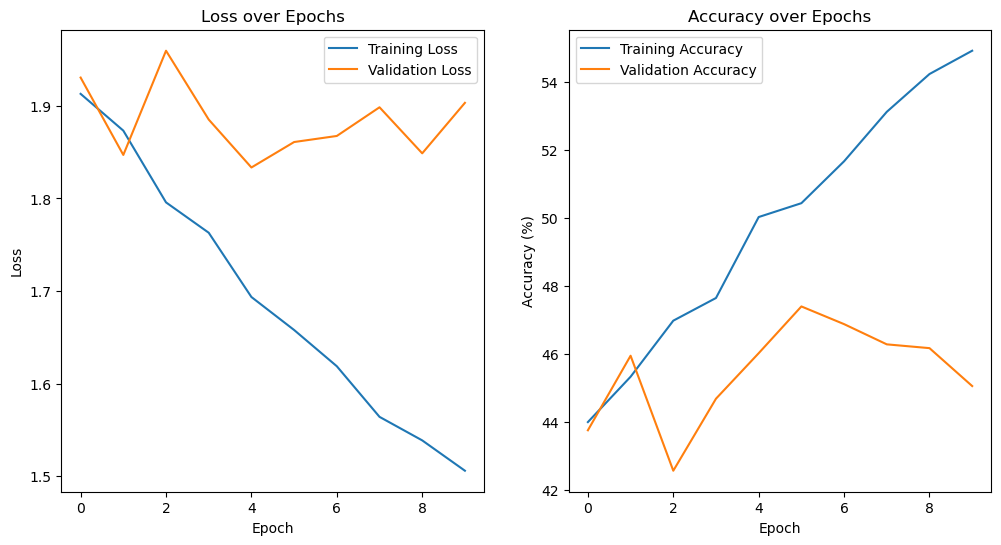

In [ ]:
# 绘制训练和验证的损失及准确率图
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

In [ ]:
# Your code here!
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class CNN_2(nn.Module):
  def __init__(self):
    super(CNN_2, self).__init__()
    #conv1
    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
    #conv2
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
    #maxpooling
    self.maxpool1 = nn.MaxPool2d(kernel_size=2)
    #conv3
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
    #conv4
    self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
    #maxpooling
    self.maxpool2 = nn.MaxPool2d(kernel_size=2)
    #Flatten layer for transitioning between conv layers and fully connected layers
    self.flatten = nn.Flatten()

    #fc -> 128*16*16
    self.fc1 = nn.Linear(128 * 8 * 8, 512)
    #Dropout layer
    self.dropout1 = nn.Dropout(0.2)
    #fc -> 512
    self.fc2 = nn.Linear(512, 128)
    #Dropout layer
    self.dropout2 = nn.Dropout(0.2)
    #output
    self.fc3 = nn.Linear(128, 30)
    #Activation
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.maxpool1(self.relu(self.conv1(x)))
    x = self.maxpool1(self.relu(self.conv2(x)))
    x = self.relu(self.conv3(x))
    x = self.maxpool2(self.relu(self.conv4(x)))
    x = self.flatten(x)
    x = self.dropout1(self.relu(self.fc1(x)))
    x = self.dropout2(self.relu(self.fc2(x)))
    x = self.fc3(x)
    return x

# 定义数据增强技术
data_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # 随机水平翻转
    transforms.RandomRotation(10),  # 在(-10, 10)度内随机旋转
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # 随机调整亮度、对比度和饱和度
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # 随机平移
    transforms.RandomResizedCrop(64, scale=(0.8, 1.0)),  # 随机裁剪然后调整大小
    transforms.ToTensor(),  # 转换为Tensor
])

# 应用数据增强并加载数据集
augmented_dataset = datasets.ImageFolder(root='H:/Deep Learning/comp5625M_data_assessment_1/train_set/train_set', transform=data_transforms)

# 应用数据增强并加载数据集
augmented_dataset = datasets.ImageFolder(root='H:/Deep Learning/comp5625M_data_assessment_1/train_set/train_set', transform=data_transforms)

# 拆分数据集为训练集和验证集
train_size = int(0.8 * len(augmented_dataset))
val_size = len(augmented_dataset) - train_size
train_dataset, val_dataset = random_split(augmented_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, drop_last=True)

from tqdm import tqdm

# 训练模型
num_epochs = 10
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model_CNN.train()
    total_train_loss = 0
    total_train_correct = 0
    total_train_samples = 0

    # 包装train_loader迭代器以显示进度条
    for data, target in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Training'):
        optimizer.zero_grad()
        output = model_CNN(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        total_train_correct += (output.argmax(1) == target).type(torch.float).sum().item()
        total_train_samples += target.size(0)

    train_losses.append(total_train_loss / len(train_loader))
    train_accuracies.append((total_train_correct / total_train_samples) * 100)

    # 验证过程
    model_CNN.eval()
    total_val_loss = 0
    total_val_correct = 0
    total_val_samples = 0

    # 包装val_loader迭代器以显示进度条
    with torch.no_grad():
        for data, target in tqdm(val_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Validation'):
            output = model_CNN(data)
            loss = loss_function(output, target)

            total_val_loss += loss.item()
            total_val_correct += (output.argmax(1) == target).type(torch.float).sum().item()
            total_val_samples += target.size(0)

    val_losses.append(total_val_loss / len(val_loader))
    val_accuracies.append((total_val_correct / total_val_samples) * 100)

    print(f'Epoch {epoch+1}: Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.2f}%, '
          f'Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracies[-1]:.2f}%')

Epoch 1/10 - Validation: 100%|█████████████████████████████████████████████████████| 84/84 [00:09<00:00,  8.64it/s]


Epoch 1: Train Loss: 1.5689, Train Accuracy: 53.05%, Val Loss: 1.5296, Val Accuracy: 54.39%


Epoch 2/10 - Validation: 100%|█████████████████████████████████████████████████████| 84/84 [00:09<00:00,  8.71it/s]


Epoch 2: Train Loss: 1.5071, Train Accuracy: 55.23%, Val Loss: 1.6132, Val Accuracy: 52.75%


Epoch 3/10 - Validation: 100%|█████████████████████████████████████████████████████| 84/84 [00:09<00:00,  8.80it/s]


Epoch 3: Train Loss: 1.4788, Train Accuracy: 55.90%, Val Loss: 1.5811, Val Accuracy: 53.24%


Epoch 4/10 - Validation: 100%|█████████████████████████████████████████████████████| 84/84 [00:09<00:00,  8.47it/s]


Epoch 4: Train Loss: 1.4412, Train Accuracy: 56.80%, Val Loss: 1.6847, Val Accuracy: 50.60%


Epoch 5/10 - Validation: 100%|█████████████████████████████████████████████████████| 84/84 [00:09<00:00,  8.66it/s]


Epoch 5: Train Loss: 1.4117, Train Accuracy: 57.35%, Val Loss: 1.5696, Val Accuracy: 53.46%


Epoch 6/10 - Validation: 100%|█████████████████████████████████████████████████████| 84/84 [00:09<00:00,  8.68it/s]


Epoch 6: Train Loss: 1.3793, Train Accuracy: 58.46%, Val Loss: 1.6928, Val Accuracy: 51.00%


Epoch 7/10 - Validation: 100%|█████████████████████████████████████████████████████| 84/84 [00:09<00:00,  8.77it/s]


Epoch 7: Train Loss: 1.3535, Train Accuracy: 59.00%, Val Loss: 1.6364, Val Accuracy: 52.68%


Epoch 8/10 - Validation: 100%|█████████████████████████████████████████████████████| 84/84 [00:10<00:00,  8.14it/s]


Epoch 8: Train Loss: 1.3327, Train Accuracy: 59.72%, Val Loss: 1.7072, Val Accuracy: 51.34%


Epoch 9/10 - Validation: 100%|█████████████████████████████████████████████████████| 84/84 [00:09<00:00,  8.78it/s]


Epoch 9: Train Loss: 1.3075, Train Accuracy: 60.36%, Val Loss: 1.6050, Val Accuracy: 53.98%


Epoch 10/10 - Validation: 100%|████████████████████████████████████████████████████| 84/84 [00:09<00:00,  8.70it/s]

Epoch 10: Train Loss: 1.2655, Train Accuracy: 61.59%, Val Loss: 1.6741, Val Accuracy: 52.23%


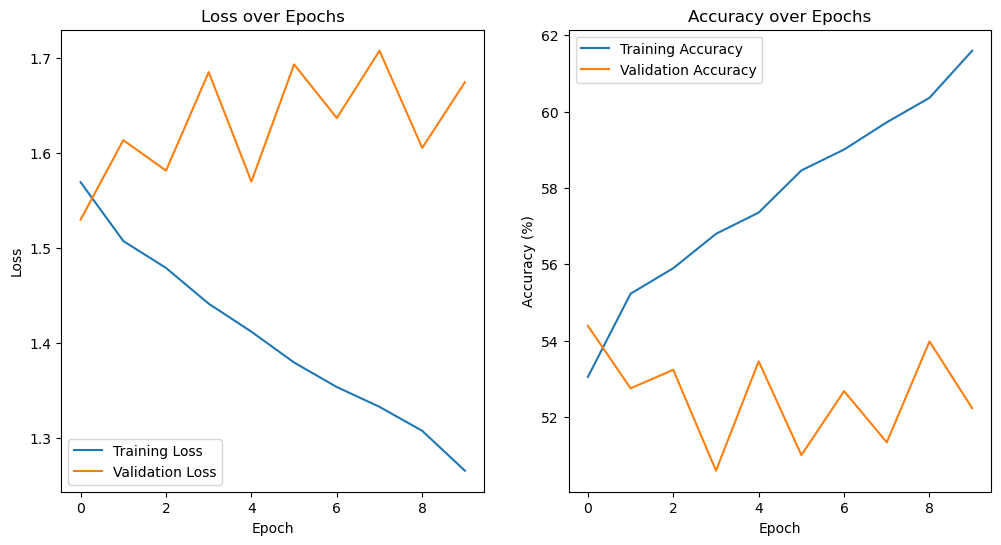

In [ ]:
# 绘制训练和验证的损失及准确率图
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

In [ ]:
# Your code here!
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from tqdm import tqdm
from torch.utils.data import DataLoader, random_split

class CNN_2(nn.Module):
  def __init__(self):
    super(CNN_2, self).__init__()
    #conv1
    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
    #conv2
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
    #maxpooling
    self.maxpool1 = nn.MaxPool2d(kernel_size=2)
    #conv3
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
    #conv4
    self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
    #maxpooling
    self.maxpool2 = nn.MaxPool2d(kernel_size=2)
    #Flatten layer for transitioning between conv layers and fully connected layers
    self.flatten = nn.Flatten()

    #fc -> 128*16*16
    self.fc1 = nn.Linear(128 * 8 * 8, 512)
    #Dropout layer
    self.dropout1 = nn.Dropout(0.3)
    #fc -> 512
    self.fc2 = nn.Linear(512, 128)
    #Dropout layer
    self.dropout2 = nn.Dropout(0.3)
    #output
    self.fc3 = nn.Linear(128, 30)
    #Activation
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.maxpool1(self.relu(self.conv1(x)))
    x = self.maxpool1(self.relu(self.conv2(x)))
    x = self.relu(self.conv3(x))
    x = self.maxpool2(self.relu(self.conv4(x)))
    x = self.flatten(x)
    x = self.dropout1(self.relu(self.fc1(x)))
    x = self.dropout2(self.relu(self.fc2(x)))
    x = self.fc3(x)
    return x

# 定义数据增强技术
data_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # 随机水平翻转
    transforms.RandomRotation(10),  # 在(-10, 10)度内随机旋转
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # 随机调整亮度、对比度和饱和度
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # 随机平移
    transforms.RandomResizedCrop(64, scale=(0.8, 1.0)),  # 随机裁剪然后调整大小
    transforms.ToTensor(),  # 转换为Tensor
])

# 应用数据增强并加载数据集
augmented_dataset = datasets.ImageFolder(root='H:/Deep Learning/comp5625M_data_assessment_1/train_set/train_set', transform=data_transforms)

# 应用数据增强并加载数据集
augmented_dataset = datasets.ImageFolder(root='H:/Deep Learning/comp5625M_data_assessment_1/train_set/train_set', transform=data_transforms)

# 拆分数据集为训练集和验证集
train_size = int(0.8 * len(augmented_dataset))
val_size = len(augmented_dataset) - train_size
train_dataset, val_dataset = random_split(augmented_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, drop_last=True)

loss_function = nn.CrossEntropyLoss()

model_CNN = CNN_2()
optimizer = optim.Adam(model_CNN.parameters(), lr=0.001)

# 训练模型
num_epochs = 10
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model_CNN.train()
    total_train_loss = 0
    total_train_correct = 0
    total_train_samples = 0

    # 包装train_loader迭代器以显示进度条
    for data, target in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Training'):
        optimizer.zero_grad()
        output = model_CNN(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        total_train_correct += (output.argmax(1) == target).type(torch.float).sum().item()
        total_train_samples += target.size(0)

    train_losses.append(total_train_loss / len(train_loader))
    train_accuracies.append((total_train_correct / total_train_samples) * 100)

    # 验证过程
    model_CNN.eval()
    total_val_loss = 0
    total_val_correct = 0
    total_val_samples = 0

    # 包装val_loader迭代器以显示进度条
    with torch.no_grad():
        for data, target in tqdm(val_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Validation'):
            output = model_CNN(data)
            loss = loss_function(output, target)

            total_val_loss += loss.item()
            total_val_correct += (output.argmax(1) == target).type(torch.float).sum().item()
            total_val_samples += target.size(0)

    val_losses.append(total_val_loss / len(val_loader))
    val_accuracies.append((total_val_correct / total_val_samples) * 100)

    print(f'Epoch {epoch+1}: Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.2f}%, '
          f'Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracies[-1]:.2f}%')

Epoch 1/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:15<00:00,  5.57it/s]


Epoch 1: Train Loss: 3.2511, Train Accuracy: 7.62%, Val Loss: 3.1183, Val Accuracy: 10.34%


Epoch 2/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:15<00:00,  5.53it/s]


Epoch 2: Train Loss: 3.0045, Train Accuracy: 13.12%, Val Loss: 2.9231, Val Accuracy: 14.96%


Epoch 3/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:14<00:00,  5.75it/s]


Epoch 3: Train Loss: 2.8479, Train Accuracy: 17.03%, Val Loss: 2.7812, Val Accuracy: 19.35%


Epoch 4/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:13<00:00,  6.04it/s]


Epoch 4: Train Loss: 2.6825, Train Accuracy: 21.81%, Val Loss: 2.6270, Val Accuracy: 23.18%


Epoch 5/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:14<00:00,  5.94it/s]


Epoch 5: Train Loss: 2.5388, Train Accuracy: 25.71%, Val Loss: 2.5417, Val Accuracy: 25.97%


Epoch 6/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:14<00:00,  6.00it/s]


Epoch 6: Train Loss: 2.4115, Train Accuracy: 29.83%, Val Loss: 2.4771, Val Accuracy: 28.27%


Epoch 7/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:14<00:00,  5.83it/s]


Epoch 7: Train Loss: 2.2824, Train Accuracy: 33.21%, Val Loss: 2.3640, Val Accuracy: 31.77%


Epoch 8/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:14<00:00,  5.88it/s]


Epoch 8: Train Loss: 2.1975, Train Accuracy: 35.84%, Val Loss: 2.2914, Val Accuracy: 34.60%


Epoch 9/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:15<00:00,  5.53it/s]


Epoch 9: Train Loss: 2.1015, Train Accuracy: 38.44%, Val Loss: 2.2067, Val Accuracy: 37.24%


Epoch 10/10 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:14<00:00,  5.67it/s]

Epoch 10: Train Loss: 2.0052, Train Accuracy: 41.31%, Val Loss: 2.1489, Val Accuracy: 38.28%


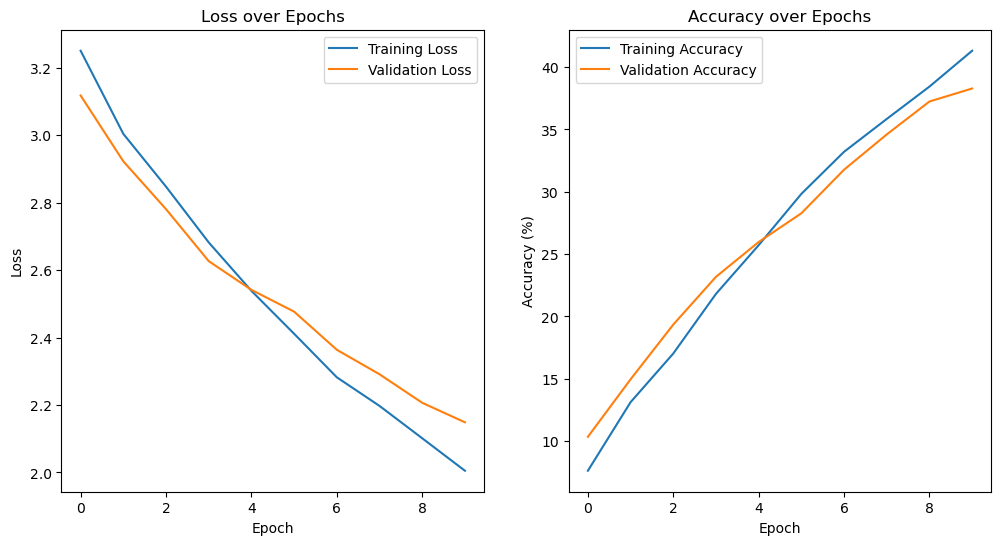

In [ ]:
# 绘制训练和验证的损失及准确率图
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

In [ ]:
# Your code here!
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader, random_split

class CNN_2(nn.Module):
  def __init__(self):
    super(CNN_2, self).__init__()
    #conv1
    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
    #conv2
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
    #maxpooling
    self.maxpool1 = nn.MaxPool2d(kernel_size=2)
    #conv3
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
    #conv4
    self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
    #maxpooling
    self.maxpool2 = nn.MaxPool2d(kernel_size=2)
    #Flatten layer for transitioning between conv layers and fully connected layers
    self.flatten = nn.Flatten()

    #fc -> 128*16*16
    self.fc1 = nn.Linear(128 * 8 * 8, 512)
    #Dropout layer
    self.dropout1 = nn.Dropout(0.3)
    #fc -> 512
    self.fc2 = nn.Linear(512, 128)
    #Dropout layer
    self.dropout2 = nn.Dropout(0.3)
    #output
    self.fc3 = nn.Linear(128, 30)
    #Activation
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.maxpool1(self.relu(self.conv1(x)))
    x = self.maxpool1(self.relu(self.conv2(x)))
    x = self.relu(self.conv3(x))
    x = self.maxpool2(self.relu(self.conv4(x)))
    x = self.flatten(x)
    x = self.dropout1(self.relu(self.fc1(x)))
    x = self.dropout2(self.relu(self.fc2(x)))
    x = self.fc3(x)
    return x

# 定义数据增强技术
data_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # 随机水平翻转
    transforms.RandomRotation(10),  # 在(-10, 10)度内随机旋转
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # 随机调整亮度、对比度和饱和度
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # 随机平移
    transforms.RandomResizedCrop(64, scale=(0.8, 1.0)),  # 随机裁剪然后调整大小
    transforms.ToTensor(),  # 转换为Tensor
])

# 应用数据增强并加载数据集
augmented_dataset = datasets.ImageFolder(root='H:/Deep Learning/comp5625M_data_assessment_1/train_set/train_set', transform=data_transforms)

# 应用数据增强并加载数据集
augmented_dataset = datasets.ImageFolder(root='H:/Deep Learning/comp5625M_data_assessment_1/train_set/train_set', transform=data_transforms)

# 定义学习率调度器
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

# 拆分数据集为训练集和验证集
train_size = int(0.8 * len(augmented_dataset))
val_size = len(augmented_dataset) - train_size
train_dataset, val_dataset = random_split(augmented_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, drop_last=True)

from tqdm import tqdm

# 训练模型
num_epochs = 50
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model_CNN.train()
    total_train_loss = 0
    total_train_correct = 0
    total_train_samples = 0

    # 包装train_loader迭代器以显示进度条
    for data, target in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Training'):
        optimizer.zero_grad()
        output = model_CNN(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        total_train_correct += (output.argmax(1) == target).type(torch.float).sum().item()
        total_train_samples += target.size(0)

    train_losses.append(total_train_loss / len(train_loader))
    train_accuracies.append((total_train_correct / total_train_samples) * 100)

    # 验证过程
    model_CNN.eval()
    total_val_loss = 0
    total_val_correct = 0
    total_val_samples = 0

    # 包装val_loader迭代器以显示进度条
    with torch.no_grad():
        for data, target in tqdm(val_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Validation'):
            output = model_CNN(data)
            loss = loss_function(output, target)

            total_val_loss += loss.item()
            total_val_correct += (output.argmax(1) == target).type(torch.float).sum().item()
            total_val_samples += target.size(0)

    val_losses.append(total_val_loss / len(val_loader))
    val_accuracies.append((total_val_correct / total_val_samples) * 100)

    #更新学习率
    scheduler.step()

    print(f'Epoch {epoch+1}: Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.2f}%, '
          f'Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracies[-1]:.2f}%')

Epoch 1/50 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:14<00:00,  5.66it/s]


Epoch 1: Train Loss: 3.2389, Train Accuracy: 7.96%, Val Loss: 3.0911, Val Accuracy: 11.76%


Epoch 2/50 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:14<00:00,  5.65it/s]


Epoch 2: Train Loss: 3.0039, Train Accuracy: 13.33%, Val Loss: 2.9994, Val Accuracy: 13.47%


Epoch 3/50 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:14<00:00,  5.74it/s]


Epoch 3: Train Loss: 2.8502, Train Accuracy: 16.99%, Val Loss: 2.7832, Val Accuracy: 19.01%


Epoch 4/50 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:14<00:00,  5.71it/s]


Epoch 4: Train Loss: 2.7014, Train Accuracy: 21.18%, Val Loss: 2.6327, Val Accuracy: 24.14%


Epoch 5/50 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:14<00:00,  5.77it/s]


Epoch 5: Train Loss: 2.5489, Train Accuracy: 25.33%, Val Loss: 2.5967, Val Accuracy: 26.34%


Epoch 6/50 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:15<00:00,  5.47it/s]


Epoch 6: Train Loss: 2.3251, Train Accuracy: 32.35%, Val Loss: 2.3604, Val Accuracy: 31.29%


Epoch 7/50 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:14<00:00,  5.70it/s]


Epoch 7: Train Loss: 2.2630, Train Accuracy: 33.38%, Val Loss: 2.3143, Val Accuracy: 33.44%


Epoch 8/50 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:14<00:00,  5.67it/s]


Epoch 8: Train Loss: 2.2287, Train Accuracy: 34.98%, Val Loss: 2.3192, Val Accuracy: 33.82%


Epoch 9/50 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:14<00:00,  5.67it/s]


Epoch 9: Train Loss: 2.1910, Train Accuracy: 35.65%, Val Loss: 2.2501, Val Accuracy: 34.04%


Epoch 10/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:14<00:00,  5.64it/s]


Epoch 10: Train Loss: 2.1636, Train Accuracy: 36.69%, Val Loss: 2.2698, Val Accuracy: 34.64%


Epoch 11/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.82it/s]


Epoch 11: Train Loss: 2.1421, Train Accuracy: 37.09%, Val Loss: 2.2225, Val Accuracy: 35.08%


Epoch 12/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.85it/s]


Epoch 12: Train Loss: 2.1327, Train Accuracy: 37.16%, Val Loss: 2.2325, Val Accuracy: 36.20%


Epoch 13/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.92it/s]


Epoch 13: Train Loss: 2.1177, Train Accuracy: 37.55%, Val Loss: 2.2284, Val Accuracy: 35.79%


Epoch 14/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.91it/s]


Epoch 14: Train Loss: 2.1267, Train Accuracy: 37.59%, Val Loss: 2.2377, Val Accuracy: 36.09%


Epoch 15/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.90it/s]


Epoch 15: Train Loss: 2.1152, Train Accuracy: 38.38%, Val Loss: 2.2336, Val Accuracy: 35.19%


Epoch 16/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  9.02it/s]


Epoch 16: Train Loss: 2.1148, Train Accuracy: 37.82%, Val Loss: 2.1964, Val Accuracy: 36.20%


Epoch 17/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:10<00:00,  8.01it/s]


Epoch 17: Train Loss: 2.1091, Train Accuracy: 38.20%, Val Loss: 2.2394, Val Accuracy: 35.04%


Epoch 18/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.85it/s]


Epoch 18: Train Loss: 2.1040, Train Accuracy: 38.04%, Val Loss: 2.2260, Val Accuracy: 35.16%


Epoch 19/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  9.04it/s]


Epoch 19: Train Loss: 2.1179, Train Accuracy: 37.90%, Val Loss: 2.2245, Val Accuracy: 36.16%


Epoch 20/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  9.04it/s]


Epoch 20: Train Loss: 2.1124, Train Accuracy: 37.75%, Val Loss: 2.2414, Val Accuracy: 34.04%


Epoch 21/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  9.10it/s]


Epoch 21: Train Loss: 2.1092, Train Accuracy: 38.29%, Val Loss: 2.2449, Val Accuracy: 36.16%


Epoch 22/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.81it/s]


Epoch 22: Train Loss: 2.1067, Train Accuracy: 37.89%, Val Loss: 2.2347, Val Accuracy: 35.53%


Epoch 23/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.91it/s]


Epoch 23: Train Loss: 2.1072, Train Accuracy: 38.30%, Val Loss: 2.2610, Val Accuracy: 34.93%


Epoch 24/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.84it/s]


Epoch 24: Train Loss: 2.1131, Train Accuracy: 37.80%, Val Loss: 2.2196, Val Accuracy: 35.64%


Epoch 25/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.98it/s]


Epoch 25: Train Loss: 2.1089, Train Accuracy: 38.23%, Val Loss: 2.2109, Val Accuracy: 36.20%


Epoch 26/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.86it/s]


Epoch 26: Train Loss: 2.1049, Train Accuracy: 38.25%, Val Loss: 2.2282, Val Accuracy: 34.71%


Epoch 27/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.75it/s]


Epoch 27: Train Loss: 2.1201, Train Accuracy: 38.20%, Val Loss: 2.2403, Val Accuracy: 34.67%


Epoch 28/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.93it/s]


Epoch 28: Train Loss: 2.1066, Train Accuracy: 38.10%, Val Loss: 2.2310, Val Accuracy: 34.97%


Epoch 29/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.93it/s]


Epoch 29: Train Loss: 2.1140, Train Accuracy: 37.96%, Val Loss: 2.2371, Val Accuracy: 35.04%


Epoch 30/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.84it/s]


Epoch 30: Train Loss: 2.1125, Train Accuracy: 38.18%, Val Loss: 2.2328, Val Accuracy: 35.79%


Epoch 31/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.83it/s]


Epoch 31: Train Loss: 2.1149, Train Accuracy: 37.95%, Val Loss: 2.2292, Val Accuracy: 35.42%


Epoch 32/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.93it/s]


Epoch 32: Train Loss: 2.1152, Train Accuracy: 37.67%, Val Loss: 2.2294, Val Accuracy: 36.01%


Epoch 33/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.74it/s]


Epoch 33: Train Loss: 2.1129, Train Accuracy: 37.97%, Val Loss: 2.2098, Val Accuracy: 36.12%


Epoch 34/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:10<00:00,  8.22it/s]


Epoch 34: Train Loss: 2.1041, Train Accuracy: 38.12%, Val Loss: 2.2506, Val Accuracy: 34.64%


Epoch 35/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  9.01it/s]


Epoch 35: Train Loss: 2.1061, Train Accuracy: 38.34%, Val Loss: 2.2247, Val Accuracy: 36.16%


Epoch 36/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.97it/s]


Epoch 36: Train Loss: 2.1052, Train Accuracy: 37.81%, Val Loss: 2.2476, Val Accuracy: 35.12%


Epoch 37/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.88it/s]


Epoch 37: Train Loss: 2.1068, Train Accuracy: 38.00%, Val Loss: 2.2400, Val Accuracy: 34.97%


Epoch 38/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.53it/s]


Epoch 38: Train Loss: 2.1177, Train Accuracy: 37.88%, Val Loss: 2.2219, Val Accuracy: 36.76%


Epoch 39/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.97it/s]


Epoch 39: Train Loss: 2.1211, Train Accuracy: 37.46%, Val Loss: 2.2201, Val Accuracy: 35.08%


Epoch 40/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.96it/s]


Epoch 40: Train Loss: 2.1006, Train Accuracy: 38.38%, Val Loss: 2.2430, Val Accuracy: 34.86%


Epoch 41/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.91it/s]


Epoch 41: Train Loss: 2.1105, Train Accuracy: 37.82%, Val Loss: 2.2308, Val Accuracy: 35.27%


Epoch 42/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.77it/s]


Epoch 42: Train Loss: 2.1121, Train Accuracy: 38.26%, Val Loss: 2.2331, Val Accuracy: 35.60%


Epoch 43/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.72it/s]


Epoch 43: Train Loss: 2.1187, Train Accuracy: 37.33%, Val Loss: 2.2108, Val Accuracy: 36.16%


Epoch 44/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.96it/s]


Epoch 44: Train Loss: 2.1053, Train Accuracy: 37.94%, Val Loss: 2.2486, Val Accuracy: 34.82%


Epoch 45/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.97it/s]


Epoch 45: Train Loss: 2.1091, Train Accuracy: 38.18%, Val Loss: 2.2129, Val Accuracy: 35.71%


Epoch 46/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.85it/s]


Epoch 46: Train Loss: 2.1153, Train Accuracy: 38.56%, Val Loss: 2.2169, Val Accuracy: 35.68%


Epoch 47/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.86it/s]


Epoch 47: Train Loss: 2.1120, Train Accuracy: 37.88%, Val Loss: 2.2452, Val Accuracy: 35.75%


Epoch 48/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.74it/s]


Epoch 48: Train Loss: 2.1095, Train Accuracy: 38.22%, Val Loss: 2.2262, Val Accuracy: 36.01%


Epoch 49/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.80it/s]


Epoch 49: Train Loss: 2.1100, Train Accuracy: 38.36%, Val Loss: 2.2215, Val Accuracy: 35.94%


Epoch 50/50 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.74it/s]

Epoch 50: Train Loss: 2.1151, Train Accuracy: 38.02%, Val Loss: 2.2331, Val Accuracy: 35.34%


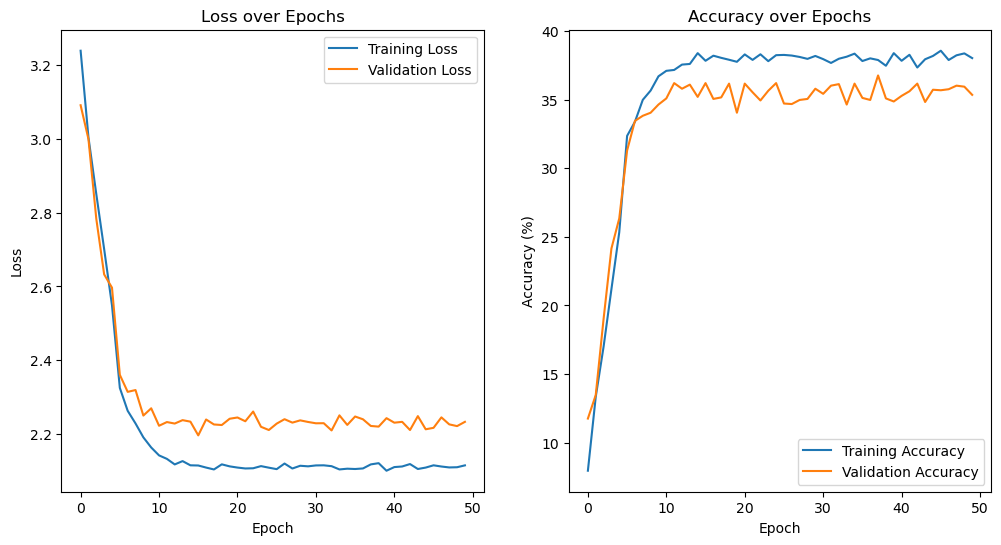

In [ ]:
# 绘制训练和验证的损失及准确率图
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

#### 2.3.3 Hyperparameter tuning (6 marks)

> Use learning rates [0.1, 0.001, 0.0001].

> Provide graphs each for loss and accuracy at three different learning rates in a single graph.

In [ ]:
# Your code here!
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from tqdm import tqdm
from torch.utils.data import DataLoader, random_split

class CNN_2(nn.Module):
  def __init__(self):
    super(CNN_2, self).__init__()
    #conv1
    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
    #conv2
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
    #maxpooling
    self.maxpool1 = nn.MaxPool2d(kernel_size=2)
    #conv3
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
    #conv4
    self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
    #maxpooling
    self.maxpool2 = nn.MaxPool2d(kernel_size=2)
    #Flatten layer for transitioning between conv layers and fully connected layers
    self.flatten = nn.Flatten()

    #fc -> 128*16*16
    self.fc1 = nn.Linear(128 * 8 * 8, 512)
    #Dropout layer
    self.dropout1 = nn.Dropout(0.3)
    #fc -> 512
    self.fc2 = nn.Linear(512, 128)
    #Dropout layer
    self.dropout2 = nn.Dropout(0.3)
    #output
    self.fc3 = nn.Linear(128, 30)
    #Activation
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.maxpool1(self.relu(self.conv1(x)))
    x = self.maxpool1(self.relu(self.conv2(x)))
    x = self.relu(self.conv3(x))
    x = self.maxpool2(self.relu(self.conv4(x)))
    x = self.flatten(x)
    x = self.dropout1(self.relu(self.fc1(x)))
    x = self.dropout2(self.relu(self.fc2(x)))
    x = self.fc3(x)
    return x

# 定义数据增强技术
data_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # 随机水平翻转
    transforms.RandomRotation(10),  # 在(-10, 10)度内随机旋转
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # 随机调整亮度、对比度和饱和度
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # 随机平移
    transforms.RandomResizedCrop(64, scale=(0.8, 1.0)),  # 随机裁剪然后调整大小
    transforms.ToTensor(),  # 转换为Tensor
])

# 应用数据增强并加载数据集
augmented_dataset = datasets.ImageFolder(root='H:/Deep Learning/comp5625M_data_assessment_1/train_set/train_set', transform=data_transforms)

# 拆分数据集为训练集和验证集
train_size = int(0.8 * len(augmented_dataset))
val_size = len(augmented_dataset) - train_size
train_dataset, val_dataset = random_split(augmented_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, drop_last=True)

# 训练模型
def train_model_with_lr(learning_rate):
    model = CNN_2()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()
    num_epochs = 10
    train_loss_history, val_loss_history, train_acc_history, val_acc_history = [], [], [], []

    for epoch in range(num_epochs):
        model.train()
        total_train_loss, total_train_correct, total_samples = 0, 0, 0
        for data, target in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Training'):
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            total_train_correct += (predicted == target).sum().item()
            total_samples += target.size(0)
        train_loss_history.append(total_train_loss / len(train_loader))
        train_acc_history.append(100. * total_train_correct / total_samples)

        model.eval()
        total_val_loss, total_val_correct, total_samples = 0, 0, 0
        with torch.no_grad():
            for data, target in tqdm(val_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Validation'):
                output = model(data)
                loss = criterion(output, target)
                total_val_loss += loss.item()
                _, predicted = torch.max(output.data, 1)
                total_val_correct += (predicted == target).sum().item()
                total_samples += target.size(0)
        val_loss_history.append(total_val_loss / len(val_loader))
        val_acc_history.append(100. * total_val_correct / total_samples)

        print(f'Epoch {epoch+1}: Train Loss: {train_loss_history[-1]:.4f}, Train Accuracy: {train_acc_history[-1]:.2f}%, 'f'Val Loss: {val_loss_history[-1]:.4f}, Val Accuracy: {val_acc_history[-1]:.2f}%')
        #print(f'Epoch {epoch+1}: Train Loss: {train_loss_history[-1]:.4f}, Train Accuracy: {train_acc_history[-1]:.2f}%, 'f'Val Loss: {val_loss_history[-1]:.4f}, Val Accuracy: {val_acc_history[-1]:.2f}%')
    return train_loss_history, val_loss_history, train_acc_history, val_acc_history

# 学习率
learning_rates = [0.1, 0.001, 0.0001]
results = {}

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    results[lr] = train_model_with_lr(lr)

    #print(f'Epoch {epoch+1}: Train Loss: {train_loss_history[-1]:.4f}, Train Accuracy: {train_acc_history[-1]:.2f}%, '
          #f'Val Loss: {val_loss_history[-1]:.4f}, Val Accuracy: {val_acc_history[-1]:.2f}%')

Training with learning rate: 0.1


Epoch 1/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:10<00:00,  8.22it/s]


Epoch 1: Train Loss: 23437.3204, Train Accuracy: 3.47%, Val Loss: 3.4114, Val Accuracy: 4.20%


Epoch 2/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:09<00:00,  8.93it/s]


Epoch 2: Train Loss: 3.4422, Train Accuracy: 3.25%, Val Loss: 3.4223, Val Accuracy: 2.94%


Epoch 3/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:10<00:00,  8.22it/s]


Epoch 3: Train Loss: 3.4331, Train Accuracy: 3.38%, Val Loss: 3.4344, Val Accuracy: 3.09%


Epoch 4/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:09<00:00,  8.66it/s]


Epoch 4: Train Loss: 3.5476, Train Accuracy: 3.35%, Val Loss: 3.4150, Val Accuracy: 3.98%


Epoch 5/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:09<00:00,  8.67it/s]


Epoch 5: Train Loss: 3.9959, Train Accuracy: 3.13%, Val Loss: 3.4273, Val Accuracy: 3.39%


Epoch 6/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:09<00:00,  8.65it/s]


Epoch 6: Train Loss: 3.4258, Train Accuracy: 3.31%, Val Loss: 3.4241, Val Accuracy: 3.09%


Epoch 7/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:10<00:00,  8.37it/s]


Epoch 7: Train Loss: 3.4252, Train Accuracy: 3.24%, Val Loss: 3.4239, Val Accuracy: 3.05%


Epoch 8/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:09<00:00,  8.85it/s]


Epoch 8: Train Loss: 3.4263, Train Accuracy: 3.03%, Val Loss: 3.4272, Val Accuracy: 3.57%


Epoch 9/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:09<00:00,  8.53it/s]


Epoch 9: Train Loss: 3.4249, Train Accuracy: 3.12%, Val Loss: 3.4233, Val Accuracy: 3.16%


Epoch 10/10 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.86it/s]


Epoch 10: Train Loss: 3.4321, Train Accuracy: 3.15%, Val Loss: 3.4168, Val Accuracy: 3.50%
Training with learning rate: 0.001


Epoch 1/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:09<00:00,  8.64it/s]


Epoch 1: Train Loss: 3.2778, Train Accuracy: 6.99%, Val Loss: 3.1278, Val Accuracy: 9.90%


Epoch 2/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:09<00:00,  8.64it/s]


Epoch 2: Train Loss: 3.0642, Train Accuracy: 12.02%, Val Loss: 2.8972, Val Accuracy: 15.25%


Epoch 3/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:09<00:00,  8.73it/s]


Epoch 3: Train Loss: 2.8973, Train Accuracy: 15.24%, Val Loss: 2.8109, Val Accuracy: 17.34%


Epoch 4/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:09<00:00,  8.51it/s]


Epoch 4: Train Loss: 2.7712, Train Accuracy: 19.10%, Val Loss: 2.6336, Val Accuracy: 22.06%


Epoch 5/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:09<00:00,  8.70it/s]


Epoch 5: Train Loss: 2.6597, Train Accuracy: 21.89%, Val Loss: 2.5605, Val Accuracy: 25.52%


Epoch 6/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:09<00:00,  8.47it/s]


Epoch 6: Train Loss: 2.5694, Train Accuracy: 25.41%, Val Loss: 2.4465, Val Accuracy: 30.10%


Epoch 7/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:09<00:00,  8.63it/s]


Epoch 7: Train Loss: 2.4916, Train Accuracy: 27.79%, Val Loss: 2.3639, Val Accuracy: 32.18%


Epoch 8/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:10<00:00,  8.36it/s]


Epoch 8: Train Loss: 2.3962, Train Accuracy: 30.73%, Val Loss: 2.2690, Val Accuracy: 33.74%


Epoch 9/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:09<00:00,  8.49it/s]


Epoch 9: Train Loss: 2.3443, Train Accuracy: 31.59%, Val Loss: 2.2575, Val Accuracy: 34.41%


Epoch 10/10 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:09<00:00,  8.64it/s]


Epoch 10: Train Loss: 2.2771, Train Accuracy: 33.80%, Val Loss: 2.3449, Val Accuracy: 33.11%
Training with learning rate: 0.0001


Epoch 1/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:10<00:00,  8.15it/s]


Epoch 1: Train Loss: 3.3196, Train Accuracy: 6.85%, Val Loss: 3.1827, Val Accuracy: 10.42%


Epoch 2/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:10<00:00,  8.12it/s]


Epoch 2: Train Loss: 3.1628, Train Accuracy: 10.41%, Val Loss: 3.0878, Val Accuracy: 12.80%


Epoch 3/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:10<00:00,  8.04it/s]


Epoch 3: Train Loss: 3.0792, Train Accuracy: 12.53%, Val Loss: 2.9797, Val Accuracy: 14.32%


Epoch 4/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:09<00:00,  8.40it/s]


Epoch 4: Train Loss: 2.9817, Train Accuracy: 14.88%, Val Loss: 2.9022, Val Accuracy: 16.44%


Epoch 5/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:11<00:00,  7.39it/s]


Epoch 5: Train Loss: 2.9081, Train Accuracy: 16.57%, Val Loss: 2.7740, Val Accuracy: 20.54%


Epoch 6/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:10<00:00,  8.13it/s]


Epoch 6: Train Loss: 2.8499, Train Accuracy: 18.04%, Val Loss: 2.7200, Val Accuracy: 20.91%


Epoch 7/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:10<00:00,  8.06it/s]


Epoch 7: Train Loss: 2.7877, Train Accuracy: 19.80%, Val Loss: 2.6860, Val Accuracy: 22.43%


Epoch 8/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:10<00:00,  8.32it/s]


Epoch 8: Train Loss: 2.7479, Train Accuracy: 20.57%, Val Loss: 2.6571, Val Accuracy: 23.74%


Epoch 9/10 - Validation: 100%|██████████████████████████████████████████████| 84/84 [00:10<00:00,  7.98it/s]


Epoch 9: Train Loss: 2.7104, Train Accuracy: 21.43%, Val Loss: 2.6260, Val Accuracy: 23.81%


Epoch 10/10 - Validation: 100%|█████████████████████████████████████████████| 84/84 [00:10<00:00,  8.17it/s]

Epoch 10: Train Loss: 2.6613, Train Accuracy: 22.81%, Val Loss: 2.6133, Val Accuracy: 24.37%


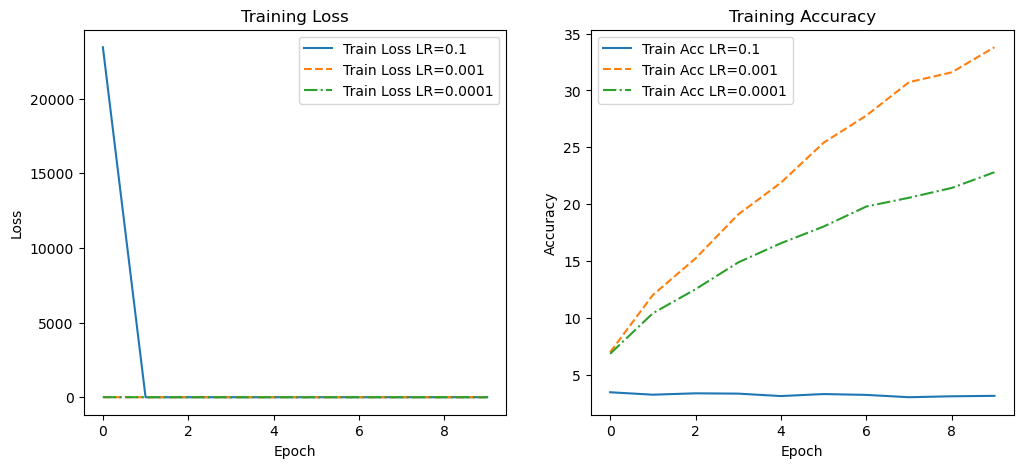

In [ ]:
plt.figure(figsize=(12, 5))

# 绘制训练损失图
plt.subplot(1, 2, 1)
line_styles = ['-', '--', '-.']  # 定义线条样式列表
for idx, (lr, (train_loss, _, _, _)) in enumerate(results.items()):
    plt.plot(train_loss, label=f'Train Loss LR={lr}', linestyle=line_styles[idx % len(line_styles)])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 绘制训练准确率图
plt.subplot(1, 2, 2)
for idx, (lr, (_, _, train_acc, _)) in enumerate(results.items()):
    plt.plot(train_acc, label=f'Train Acc LR={lr}', linestyle=line_styles[idx % len(line_styles)])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 3 Model testing [10 marks]
Online evaluation of your model performance on the test set.

> Prepare the dataloader for the testset.

> Write evaluation code for writing predictions.

> Upload it to Kaggle submission page (6 marks)


#### 3.1 Test class and predictions (4 marks)

> Build a test class, prepare a test dataloader and generate predictions

Create a PyTorch ```Dataset``` for the unlabeled test data in the test_set folder of the Kaggle competition and generate predictions using your final model. Test data can be downloaded [here](https://www.kaggle.com/competitions/comp5623m-artificial-intelligence/data?select=test_set).

In [ ]:
# Your code here!
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import os
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from torch.utils.data import DataLoader, random_split
from torchvision import transforms, datasets

class CNN_2(nn.Module):
  def __init__(self):
    super(CNN_2, self).__init__()
    #conv1
    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
    #conv2
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
    #maxpooling
    self.maxpool1 = nn.MaxPool2d(kernel_size=2)
    #conv3
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
    #conv4
    self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
    #maxpooling
    self.maxpool2 = nn.MaxPool2d(kernel_size=2)
    #Flatten layer for transitioning between conv layers and fully connected layers
    self.flatten = nn.Flatten()

    #fc -> 128*16*16
    self.fc1 = nn.Linear(128 * 8 * 8, 512)
    #Dropout layer
    self.dropout1 = nn.Dropout(0.3)
    #fc -> 512
    self.fc2 = nn.Linear(512, 128)
    #Dropout layer
    self.dropout2 = nn.Dropout(0.3)
    #output
    self.fc3 = nn.Linear(128, 30)
    #Activation
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.maxpool1(self.relu(self.conv1(x)))
    x = self.maxpool1(self.relu(self.conv2(x)))
    x = self.relu(self.conv3(x))
    x = self.maxpool2(self.relu(self.conv4(x)))
    x = self.flatten(x)
    x = self.dropout1(self.relu(self.fc1(x)))
    x = self.dropout2(self.relu(self.fc2(x)))
    x = self.fc3(x)
    return x

# 定义数据增强技术
data_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # 随机水平翻转
    transforms.RandomRotation(10),  # 在(-10, 10)度内随机旋转
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # 随机调整亮度、对比度和饱和度
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # 随机平移
    transforms.RandomResizedCrop(64, scale=(0.8, 1.0)),  # 随机裁剪然后调整大小
    transforms.ToTensor(),  # 转换为Tensor
])

# 应用数据增强并加载数据集
#augmented_dataset = datasets.ImageFolder(root='H:/Deep Learning/comp5625M_data_assessment_1/train_set/train_set', transform=data_transforms)
train_dataset = datasets.ImageFolder(root='H:/Deep Learning/comp5625M_data_assessment_1/train_set/train_set', transform=data_transforms)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# 模型训练
model = CNN_2()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_function = nn.CrossEntropyLoss()
num_epochs = 1

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for data, target in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}'):
        optimizer.zero_grad()
        output = model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch {epoch+1}: Total Loss: {total_loss:.4f}')

# 测试集准备
class TestDataset(Dataset):
    def __init__(self, root, transform=None):
        self.root = root
        self.transform = transform
        self.files = sorted(os.listdir(root))

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root, self.files[idx])
        image = datasets.folder.default_loader(img_path)  # 使用ImageFolder的默认加载器
        if self.transform is not None:
            image = self.transform(image)
        return image, self.files[idx]

test_dataset = TestDataset(root='H:/Deep Learning/comp5625M_data_assessment_1/test_set/test_set', transform=transforms.ToTensor())
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 生成预测并保存到CSV
model.eval()
predictions = []
with torch.no_grad():
    for images, image_paths in tqdm(test_loader, desc='Predicting'):
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        predictions.extend(zip(image_paths, predicted.cpu().numpy()))

# 保存预测结果
output_dir = 'H:/Deep Learning/comp5625M_data_assessment_1/submissions/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

submission = pd.DataFrame(predictions, columns=['Image', 'Class'])
#submission.to_csv('submission.csv', index=False)
submission.to_csv('H:/Deep Learning/comp5625M_data_assessment_1/submissions/submission.csv', index=False)

Epoch 1/1: 100%|██████████████████████████████████████████████████████████| 422/422 [01:51<00:00,  3.79it/s]


Epoch 1: Total Loss: 1384.4866


Predicting: 100%|███████████████████████████████████████████████████████████| 47/47 [00:04<00:00, 10.94it/s]


#### 3.2 Prepare your submission and upload to Kaggle  (6 marks)

Save all test predictions to a CSV file and submit it to the private class Kaggle competition. **Please save your test CSV file submissions using your student username (the one with letters, e.g., ``sc15jb``, not the ID with only numbers)**, for example, `sc15jb.csv`. That will help us to identify your submissions.

The CSV file must contain only two columns: ‘Id’ and ‘Category’ (predicted class ID) as shown below:

```txt
Id,Category
28d0f5e9_373c.JPEG,2
bbe4895f_40bf.JPEG,18
```

The ‘Id’ column should include the name of the image. It is important to keep the same name as the one on the test set. Do not include any path, just the name of file (with extension). Your csv file must contain 1501 rows, one for each image on test set and 1 row for the headers. [To submit please click here.](https://www.kaggle.com/t/917fe52f6a3c4855880a24b34f26db07)

> You may submit multiple times. We will use your personal top entry for allocating marks for this [6 marks].


In [ ]:
# Your code here!
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import os
import pandas as pd
import datetime
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from torch.utils.data import DataLoader, random_split
from torchvision import transforms, datasets

class CNN_2(nn.Module):
  def __init__(self):
    super(CNN_2, self).__init__()
    #conv1
    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
    #conv2
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
    #maxpooling
    self.maxpool1 = nn.MaxPool2d(kernel_size=2)
    #conv3
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
    #conv4
    self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
    #maxpooling
    self.maxpool2 = nn.MaxPool2d(kernel_size=2)
    #Flatten layer for transitioning between conv layers and fully connected layers
    self.flatten = nn.Flatten()

    #fc -> 128*16*16
    self.fc1 = nn.Linear(128 * 8 * 8, 512)
    #Dropout layer
    self.dropout1 = nn.Dropout(0.3)
    #fc -> 512
    self.fc2 = nn.Linear(512, 128)
    #Dropout layer
    self.dropout2 = nn.Dropout(0.3)
    #output
    self.fc3 = nn.Linear(128, 30)
    #Activation
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.maxpool1(self.relu(self.conv1(x)))
    x = self.maxpool1(self.relu(self.conv2(x)))
    x = self.relu(self.conv3(x))
    x = self.maxpool2(self.relu(self.conv4(x)))
    x = self.flatten(x)
    x = self.dropout1(self.relu(self.fc1(x)))
    x = self.dropout2(self.relu(self.fc2(x)))
    x = self.fc3(x)
    return x

# 定义数据增强技术
data_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # 随机水平翻转
    transforms.RandomRotation(10),  # 在(-10, 10)度内随机旋转
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # 随机调整亮度、对比度和饱和度
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # 随机平移
    transforms.RandomResizedCrop(64, scale=(0.8, 1.0)),  # 随机裁剪然后调整大小
    transforms.ToTensor(),  # 转换为Tensor
])

# 应用相同的转换步骤到测试集
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),  # 确保和训练集一致
    transforms.ToTensor(),
])
# 应用数据增强并加载数据集
#augmented_dataset = datasets.ImageFolder(root='H:/Deep Learning/comp5625M_data_assessment_1/train_set/train_set', transform=data_transforms)
train_dataset = datasets.ImageFolder(root='H:/Deep Learning/comp5625M_data_assessment_1/train_set/train_set', transform=data_transforms)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

#也可以加一个model_patch把每次训练好的权重保存下来，这样就不用每次训练了，可以通过
#model.load_state_dict(torch.load('model_path'))来直接在预测部分调用这个训练好的权重。
#因为我还没有进行更大epoch的训练，所以我就不调用了
# 模型训练
model = CNN_2()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_function = nn.CrossEntropyLoss()
num_epochs = 100
save_every = 20

output_dir = 'H:/Deep Learning/comp5625M_data_assessment_1/saved_models/'
if not os.path.exists(output_dir):
  os.makedirs(output_dir)

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for data, target in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}'):
        optimizer.zero_grad()
        output = model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch {epoch+1}: Total Loss: {total_loss:.4f}')

'''
    # 每20个epoch保存一次权重
    if (epoch + 1) % save_every == 0:
        model_files = [f for f in os.listdir(output_dir) if f.startswith('model_cnn')]
        model_index = len(model_files) + 1  # 加1以创建新的索引

        # 保存模型权重
        model_path = os.path.join(output_dir, f'model_cnn_{model_index}.pth')
        torch.save(model.state_dict(), model_path)
        print(f'Saved model as {model_path}')
'''

    # 每20个epoch保存一次权重
    if (epoch + 1) % save_every == 0:
      #创建一个时间戳
      timestamp = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
      model_path = os.path.join(output_dir, f'model_cnn_{epoch+1}_{timestamp}.pth')
      torch.save(model.state_dict(), model_path)
      print(f'Saved model as {model_path}')

'''
    if(epoch + 1) % save_every == 0:
      # 保存权重weight
      output_dir = 'H:/Deep Learning/comp5625M_data_assessment_1/saved_models/'
      if not os.path.exists(output_dir):
        os.makedirs(output_dir)

# 检查之前保存的权重文件数量，并在文件名中加入递增编号
model_files = [f for f in os.listdir(output_dir) if f.startswith('model_cnn')]
model_index = len(model_files)

# 保存模型权重
model_path = os.path.join(output_dir, f'model_cnn_{model_index}.pth')
torch.save(model.state_dict(), model_path)
'''

# 测试集准备
class TestDataset(Dataset):
    def __init__(self, root, transform=None):
        self.root = root
        self.transform = transform
        self.files = sorted(os.listdir(root))

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        #img_path = os.path.join(self.root, self.files[idx])
        img_path = os.path.join(self.root, self.files[idx])
        image = datasets.folder.default_loader(img_path)  # 使用ImageFolder的默认加载器
        #image = Image.open(img_path).convert('RGB')
        if self.transform is not None:
            image = self.transform(image)
        #return image, self.files[idx]
        return image, self.files[idx]

#test_dataset = TestDataset(root='H:/Deep Learning/comp5625M_data_assessment_1/test_set/test_set', transform=transforms.ToTensor())
#Record a mistake 记录一下出错的点
#在创建TestDataset实例时，transform=test_transforms()这一行不正确。test_transforms是一个transforms.Compose对象，它应该直接传递给TestDataset，而不是调用它（即去掉后面的括号）
#test_dataset = TestDataset(root='H:/Deep Learning/comp5625M_data_assessment_1/test_set/test_set', transform=test_transforms())

test_dataset = TestDataset(root='H:/Deep Learning/comp5625M_data_assessment_1/test_set/test_set', transform=test_transforms)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
'''
# 保存权重weight
output_dir = 'H:/Deep Learning/comp5625M_data_assessment_1/saved_models/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 保存模型权重
model_path = 'H:/Deep Learning/comp5625M_data_assessment_1/saved_models/model_cnn.pth'
torch.save(model.state_dict(), model_path)

#model_path = 'H:/Deep Learning/comp5625M_data_assessment_1/saved_models/model_cnn.pth'
#model.load_state_dict(torch.load(model_path))
'''
'''
# 保存权重weight
output_dir = 'H:/Deep Learning/comp5625M_data_assessment_1/saved_models/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 检查之前保存的权重文件数量，并在文件名中加入递增编号
model_files = [f for f in os.listdir(output_dir) if f.startswith('model_cnn')]
model_index = len(model_files)

# 保存模型权重
model_path = os.path.join(output_dir, f'model_cnn_{model_index}.pth')
torch.save(model.state_dict(), model_path)
'''

# 生成预测并保存到CSV
model.eval()
predictions = []
with torch.no_grad():
    for images, image_paths in tqdm(test_loader, desc='Predicting'):
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        predictions.extend(zip(image_paths, predicted.cpu().numpy()))
    print(f'Complete！')
'''
# 保存预测结果
output_dir = 'H:/Deep Learning/comp5625M_data_assessment_1/submissions/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

submission = pd.DataFrame(predictions, columns=['ID', 'Category'])
#submission.to_csv('submission.csv', index=False)
submission.to_csv('H:/Deep Learning/comp5625M_data_assessment_1/submissions/sc23b2h.csv', index=False)
'''

# 保存预测结果
submission_dir = 'H:/Deep Learning/comp5625M_data_assessment_1/submissions/'
if not os.path.exists(submission_dir):
    os.makedirs(submission_dir)

submission = pd.DataFrame(predictions, columns=['ID', 'Category'])
timestamp = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
submission_path = os.path.join(submission_dir. f'sc23b2h_{timestamp}.csv')
submission.to_csv(submission_path, index=False)
print(f'Submission saved as {submission_path}')
#submission_files = [f for f in os.listdir(submission_dir) if f.startswith('sc23b2h')]
#submission_index = len(submission_files)

#submission_path = os.path.join(submission_dir, f'sc23b2h_{submission_index}.csv')
#submission.to_csv(submission_path, index=False)

Epoch 1/100: 100%|████████████████████████████████████████████████████████| 422/422 [01:41<00:00,  4.15it/s]


Epoch 1: Total Loss: 1380.8390


Epoch 2/100: 100%|████████████████████████████████████████████████████████| 422/422 [01:43<00:00,  4.09it/s]


Epoch 2: Total Loss: 1264.6010


Epoch 3/100: 100%|████████████████████████████████████████████████████████| 422/422 [01:46<00:00,  3.97it/s]


Epoch 3: Total Loss: 1200.6164


Epoch 4/100: 100%|████████████████████████████████████████████████████████| 422/422 [01:44<00:00,  4.05it/s]


Epoch 4: Total Loss: 1150.4716


Epoch 5/100: 100%|████████████████████████████████████████████████████████| 422/422 [01:43<00:00,  4.09it/s]


Epoch 5: Total Loss: 1112.2988


Epoch 6/100: 100%|████████████████████████████████████████████████████████| 422/422 [01:44<00:00,  4.02it/s]


Epoch 6: Total Loss: 1067.7723


Epoch 7/100: 100%|████████████████████████████████████████████████████████| 422/422 [01:44<00:00,  4.03it/s]


Epoch 7: Total Loss: 1029.5575


Epoch 8/100: 100%|████████████████████████████████████████████████████████| 422/422 [01:43<00:00,  4.06it/s]


Epoch 8: Total Loss: 992.2755


Epoch 9/100: 100%|████████████████████████████████████████████████████████| 422/422 [01:44<00:00,  4.04it/s]


Epoch 9: Total Loss: 957.7423


Epoch 10/100: 100%|███████████████████████████████████████████████████████| 422/422 [01:43<00:00,  4.07it/s]


Epoch 10: Total Loss: 936.2537


Epoch 11/100: 100%|███████████████████████████████████████████████████████| 422/422 [01:44<00:00,  4.04it/s]


Epoch 11: Total Loss: 917.5644


Epoch 12/100: 100%|███████████████████████████████████████████████████████| 422/422 [01:45<00:00,  4.00it/s]


Epoch 12: Total Loss: 893.1873


Epoch 13/100: 100%|███████████████████████████████████████████████████████| 422/422 [01:44<00:00,  4.04it/s]


Epoch 13: Total Loss: 880.4245


Epoch 14/100: 100%|███████████████████████████████████████████████████████| 422/422 [01:44<00:00,  4.04it/s]


Epoch 14: Total Loss: 871.6424


Epoch 15/100: 100%|███████████████████████████████████████████████████████| 422/422 [01:44<00:00,  4.04it/s]


Epoch 15: Total Loss: 850.9571


Epoch 16/100: 100%|███████████████████████████████████████████████████████| 422/422 [01:44<00:00,  4.05it/s]


Epoch 16: Total Loss: 840.6340


Epoch 17/100: 100%|███████████████████████████████████████████████████████| 422/422 [01:44<00:00,  4.05it/s]


Epoch 17: Total Loss: 828.8383


Epoch 18/100: 100%|███████████████████████████████████████████████████████| 422/422 [01:44<00:00,  4.03it/s]


Epoch 18: Total Loss: 820.7140


Epoch 19/100: 100%|███████████████████████████████████████████████████████| 422/422 [01:43<00:00,  4.08it/s]


Epoch 19: Total Loss: 809.3221


Epoch 20/100: 100%|███████████████████████████████████████████████████████| 422/422 [01:43<00:00,  4.06it/s]


Epoch 20: Total Loss: 808.5523
Saved model as H:/Deep Learning/comp5625M_data_assessment_1/saved_models/model_cnn_1.pth


Epoch 21/100: 100%|███████████████████████████████████████████████████████| 422/422 [01:42<00:00,  4.13it/s]


Epoch 21: Total Loss: 793.1606


Epoch 22/100: 100%|███████████████████████████████████████████████████████| 422/422 [01:43<00:00,  4.07it/s]


Epoch 22: Total Loss: 786.7695


Epoch 23/100: 100%|███████████████████████████████████████████████████████| 422/422 [01:46<00:00,  3.96it/s]


Epoch 23: Total Loss: 774.9902


Epoch 24/100: 100%|███████████████████████████████████████████████████████| 422/422 [01:50<00:00,  3.81it/s]


Epoch 24: Total Loss: 761.2838


Epoch 25/100: 100%|███████████████████████████████████████████████████████| 422/422 [01:44<00:00,  4.03it/s]


Epoch 25: Total Loss: 755.5204


Epoch 26/100: 100%|███████████████████████████████████████████████████████| 422/422 [01:45<00:00,  4.00it/s]


Epoch 26: Total Loss: 754.2287


Epoch 27/100: 100%|███████████████████████████████████████████████████████| 422/422 [01:44<00:00,  4.03it/s]


Epoch 27: Total Loss: 745.3784


Epoch 28/100: 100%|███████████████████████████████████████████████████████| 422/422 [01:43<00:00,  4.06it/s]


Epoch 28: Total Loss: 739.9999


Epoch 29/100:  29%|███████████████▊                                       | 121/422 [00:29<01:12,  4.17it/s]

##CNN_WITH_SE           ATTENTION


In [ ]:
# Your code here!
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import os
import pandas as pd
import datetime
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from torch.utils.data import DataLoader, random_split
from torchvision import transforms, datasets

#定义SE模块
class SEBlock(nn.Module):
  def __init__(self, channel, reduction=16):
    super(SEBlock, self).__init__()
    self.avg_pool = nn.AdaptiveAvgPool2d(1)
    self.fc = nn.Sequential(
        nn.Linear(channel, channel // reduction, bias=False),
        nn.ReLU(inplace=True),
        nn.Linear(channel // reduction, channel, bias=False),
        nn.Sigmoid()
    )

  def forward(self, x):
    b, c, _, _ = x.size()
    y = self.avg_pool(x).view(b, c)
    y = self.fc(y).view(b, c, 1, 1)
    return x * y.expand_as(x)

#整合SE模块的CNN
class CNN_with_SE(nn.Module):
  def __init__(self):
    super(CNN_with_SE, self).__init__()
    #conv1
    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
    self.se1 = SEBlock(32)
    #conv2
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
    self.se2 = SEBlock(64)
    #maxpooling
    self.maxpool1 = nn.MaxPool2d(kernel_size=2)
    #conv3
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
    self.se3 = SEBlock(128)
    #conv4
    self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
    self.se4 = SEBlock(128)
    #maxpooling
    self.maxpool2 = nn.MaxPool2d(kernel_size=2)
    #Flatten layer for transitioning between conv layers and fully connected layers
    self.flatten = nn.Flatten()

    #fc -> 128*16*16
    self.fc1 = nn.Linear(128 * 8 * 8, 512)
    #Dropout layer
    self.dropout1 = nn.Dropout(0.3)
    #fc -> 512
    self.fc2 = nn.Linear(512, 128)
    #Dropout layer
    self.dropout2 = nn.Dropout(0.3)
    #output
    self.fc3 = nn.Linear(128, 30)
    #Activation
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.maxpool1(self.relu(self.se1(self.conv1(x))))
    x = self.maxpool1(self.relu(self.se2(self.conv2(x))))
    x = self.relu(self.se3(self.conv3(x)))
    x = self.maxpool2(self.se4(self.relu(self.conv4(x))))
    x = self.flatten(x)
    x = self.dropout1(self.relu(self.fc1(x)))
    x = self.dropout2(self.relu(self.fc2(x)))
    x = self.fc3(x)
    return x

#model = CNN_with_SE()

# 定义数据增强技术
data_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # 随机水平翻转
    transforms.RandomRotation(10),  # 在(-10, 10)度内随机旋转
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # 随机调整亮度、对比度和饱和度
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # 随机平移
    transforms.RandomResizedCrop(64, scale=(0.8, 1.0)),  # 随机裁剪然后调整大小
    transforms.ToTensor(),  # 转换为Tensor
])

# 应用相同的转换步骤到测试集
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),  # 确保和训练集一致
    transforms.ToTensor(),
])
# 应用数据增强并加载数据集
train_dataset = datasets.ImageFolder(root='H:/Deep Learning/comp5625M_data_assessment_1/train_set/train_set', transform=data_transforms)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# 模型训练
model = CNN_with_SE()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_function = nn.CrossEntropyLoss()
num_epochs = 100
save_every = 20

output_dir = 'H:/Deep Learning/comp5625M_data_assessment_1/saved_models/'
if not os.path.exists(output_dir):
  os.makedirs(output_dir)

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for data, target in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}'):
        optimizer.zero_grad()
        output = model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch {epoch+1}: Total Loss: {total_loss:.4f}')


    # 每20个epoch保存一次权重
    if (epoch + 1) % save_every == 0:
      #创建一个时间戳
      timestamp = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
      model_path = os.path.join(output_dir, f'model_cnn_{epoch+1}_{timestamp}.pth')
      torch.save(model.state_dict(), model_path)
      print(f'Saved model as {model_path}')


# 测试集准备
class TestDataset(Dataset):
    def __init__(self, root, transform=None):
        self.root = root
        self.transform = transform
        self.files = sorted(os.listdir(root))

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        #img_path = os.path.join(self.root, self.files[idx])
        img_path = os.path.join(self.root, self.files[idx])
        image = datasets.folder.default_loader(img_path)  # 使用ImageFolder的默认加载器
        #image = Image.open(img_path).convert('RGB')
        if self.transform is not None:
            image = self.transform(image)
        #return image, self.files[idx]
        return image, self.files[idx]

test_dataset = TestDataset(root='H:/Deep Learning/comp5625M_data_assessment_1/test_set/test_set', transform=test_transforms)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 生成预测并保存到CSV
model.eval()
predictions = []
with torch.no_grad():
    for images, image_paths in tqdm(test_loader, desc='Predicting'):
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        predictions.extend(zip(image_paths, predicted.cpu().numpy()))
    print(f'Complete！')

# 保存预测结果
submission_dir = 'H:/Deep Learning/comp5625M_data_assessment_1/submissions/'
if not os.path.exists(submission_dir):ZXXXCZXXCCCCCCCCCZXZXXXZXXCCVM<>
    os.makedirs(submission_dir)

submission = pd.DataFrame(predictions, columns=['ID', 'Category'])
timestamp = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
submission_path = os.path.join(submission_dir, f'sc23b2h_{timestamp}.csv')
submission.to_csv(submission_path, index=False)
print(f'Submission saved as {submission_path}')

Epoch 1/100: 100%|████████████████████████████████████████████████████████| 422/422 [04:47<00:00,  1.47it/s]


Epoch 1: Total Loss: 1395.0779


Epoch 2/100: 100%|████████████████████████████████████████████████████████| 422/422 [03:21<00:00,  2.10it/s]


Epoch 2: Total Loss: 1308.2982


Epoch 3/100: 100%|████████████████████████████████████████████████████████| 422/422 [02:08<00:00,  3.30it/s]


Epoch 3: Total Loss: 1265.2523


Epoch 4/100: 100%|████████████████████████████████████████████████████████| 422/422 [02:08<00:00,  3.28it/s]


Epoch 4: Total Loss: 1209.6381


Epoch 5/100: 100%|████████████████████████████████████████████████████████| 422/422 [02:09<00:00,  3.25it/s]


Epoch 5: Total Loss: 1159.0674


Epoch 6/100: 100%|████████████████████████████████████████████████████████| 422/422 [02:15<00:00,  3.12it/s]


Epoch 6: Total Loss: 1118.1482


Epoch 7/100: 100%|████████████████████████████████████████████████████████| 422/422 [02:10<00:00,  3.24it/s]


Epoch 7: Total Loss: 1090.8865


Epoch 8/100: 100%|████████████████████████████████████████████████████████| 422/422 [02:11<00:00,  3.20it/s]


Epoch 8: Total Loss: 1052.6244


Epoch 9/100: 100%|████████████████████████████████████████████████████████| 422/422 [02:10<00:00,  3.23it/s]


Epoch 9: Total Loss: 1023.3744


Epoch 10/100: 100%|███████████████████████████████████████████████████████| 422/422 [02:10<00:00,  3.22it/s]


Epoch 10: Total Loss: 993.5075


Epoch 11/100: 100%|███████████████████████████████████████████████████████| 422/422 [02:13<00:00,  3.16it/s]


Epoch 11: Total Loss: 975.1522


Epoch 12/100: 100%|███████████████████████████████████████████████████████| 422/422 [02:19<00:00,  3.02it/s]


Epoch 12: Total Loss: 961.0150


Epoch 13/100: 100%|███████████████████████████████████████████████████████| 422/422 [02:21<00:00,  2.98it/s]


Epoch 13: Total Loss: 944.3254


Epoch 14/100: 100%|███████████████████████████████████████████████████████| 422/422 [02:22<00:00,  2.96it/s]


Epoch 14: Total Loss: 935.3864


Epoch 15/100: 100%|███████████████████████████████████████████████████████| 422/422 [03:12<00:00,  2.20it/s]


Epoch 15: Total Loss: 920.7680


Epoch 16/100: 100%|███████████████████████████████████████████████████████| 422/422 [02:56<00:00,  2.39it/s]


Epoch 16: Total Loss: 902.6610


Epoch 17/100: 100%|███████████████████████████████████████████████████████| 422/422 [02:26<00:00,  2.89it/s]


Epoch 17: Total Loss: 886.9704


Epoch 18/100: 100%|███████████████████████████████████████████████████████| 422/422 [02:47<00:00,  2.51it/s]


Epoch 18: Total Loss: 884.0467


Epoch 19/100: 100%|███████████████████████████████████████████████████████| 422/422 [03:05<00:00,  2.27it/s]


Epoch 19: Total Loss: 877.0512


Epoch 20/100: 100%|███████████████████████████████████████████████████████| 422/422 [02:50<00:00,  2.48it/s]


Epoch 20: Total Loss: 871.5391
Saved model as H:/Deep Learning/comp5625M_data_assessment_1/saved_models/model_cnn_20_20240226_122913.pth


Epoch 21/100: 100%|███████████████████████████████████████████████████████| 422/422 [02:52<00:00,  2.44it/s]


Epoch 21: Total Loss: 853.1255


Epoch 22/100: 100%|███████████████████████████████████████████████████████| 422/422 [02:57<00:00,  2.37it/s]


Epoch 22: Total Loss: 842.2684


Epoch 23/100: 100%|███████████████████████████████████████████████████████| 422/422 [02:53<00:00,  2.43it/s]


Epoch 23: Total Loss: 832.6033


Epoch 24/100: 100%|███████████████████████████████████████████████████████| 422/422 [02:40<00:00,  2.63it/s]


Epoch 24: Total Loss: 826.6719


Epoch 25/100: 100%|███████████████████████████████████████████████████████| 422/422 [02:49<00:00,  2.49it/s]


Epoch 25: Total Loss: 818.4388


Epoch 26/100: 100%|███████████████████████████████████████████████████████| 422/422 [02:39<00:00,  2.65it/s]


Epoch 26: Total Loss: 811.5775


Epoch 27/100: 100%|███████████████████████████████████████████████████████| 422/422 [02:21<00:00,  2.98it/s]


Epoch 27: Total Loss: 801.5150


Epoch 28/100: 100%|███████████████████████████████████████████████████████| 422/422 [04:52<00:00,  1.44it/s]


Epoch 28: Total Loss: 791.9769


Epoch 29/100:  90%|█████████████████████████████████████████████████▋     | 381/422 [02:46<00:17,  2.35it/s]

##CBAM

In [ ]:
# Your code here!
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import os
import pandas as pd
import datetime
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from torch.utils.data import DataLoader, random_split
from torchvision import transforms, datasets

class ChannelAttention(nn.Module):
  def __init__(self, in_channels, reduction_ratio = 16):
    super(ChannelAttention, self).__init__()
    self.avg_pool = nn.AdaptiveAvgPool2d(1)
    self.max_pool = nn.AdaptiveMaxPool2d(1)
    self.fc = nn.Sequential(
        nn.Conv2d(in_channels, in_channels // reduction_ratio, 1, bias = False),
        nn.ReLU(inplace = True),
        nn.Conv2d(in_channels // reduction_ratio, in_channels, 1, bias = False)
    )
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    avg_out = self.fc(self.avg_pool(x))
    max_out = self.fc(self.max_pool(x))
    out = avg_out + max_out
    return self.sigmoid(out)

class SpatiaAttention(nn.Module):
  def __init__(self, kernel_size = 7):
    super(SpatiaAttention, self).__init__()
    self.conv1 = nn.Conv2d(2, 1, kernel_size, padding = kernel_size//2, bias = False)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    avg_out = torch.mean(x, dim = 1, keepdim = True)
    max_out, _ = torch.max(x, dim = 1, keepdim = True)
    x = torch.cat([avg_out, max_out], dim = 1)
    x = self.conv1(x)
    return self.sigmoid(x)

class CBAMBlock(nn.Module):
  def __init__(self, in_channels, reduction_ratio = 16, kernel_size = 7):
    super(CBAMBlock, self).__init__()
    self.channel_attention = ChannelAttention(in_channels, reduction_ratio)
    self.spatial_attention = SpatiaAttention(kernel_size)

  def forward(self, x):
    x = self.channel_attention(x) * x
    x = self.spatial_attention(x) * x
    return x

class CNN_2_with_CBAM(nn.Module):
  def __init__(self):
    super(CNN_2_with_CBAM, self).__init__()
    #conv1
    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
    self.cbam1 = CBAMBlock(32)
    #conv2
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
    self.cbam2 = CBAMBlock(64)
    #maxpooling
    self.maxpool1 = nn.MaxPool2d(kernel_size=2)
    #conv3
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
    self.cbam3 = CBAMBlock(128)
    #conv4
    self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
    self.cbam4 = CBAMBlock(128)
    #maxpooling
    self.maxpool2 = nn.MaxPool2d(kernel_size=2)
    #Flatten layer for transitioning between conv layers and fully connected layers
    self.flatten = nn.Flatten()

    #fc -> 128*16*16
    self.fc1 = nn.Linear(128 * 8 * 8, 512)
    #Dropout layer
    self.dropout1 = nn.Dropout(0.3)
    #fc -> 512
    self.fc2 = nn.Linear(512, 128)
    #Dropout layer
    self.dropout2 = nn.Dropout(0.3)
    #output
    self.fc3 = nn.Linear(128, 30)
    #Activation
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.maxpool1(self.relu(self.cbam1(self.conv1(x))))
    x = self.maxpool1(self.relu(self.cbam2(self.conv2(x))))
    x = self.relu(self.cbam3(self.conv3(x)))
    x = self.maxpool2(self.relu(self.cbam4(self.conv4(x))))
    x = self.flatten(x)
    x = self.dropout1(self.relu(self.fc1(x)))
    x = self.dropout2(self.relu(self.fc2(x)))
    x = self.fc3(x)
    return x

# 定义数据增强技术
data_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # 随机水平翻转
    transforms.RandomRotation(10),  # 在(-10, 10)度内随机旋转
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # 随机调整亮度、对比度和饱和度
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # 随机平移
    transforms.RandomResizedCrop(64, scale=(0.8, 1.0)),  # 随机裁剪然后调整大小
    transforms.ToTensor(),  # 转换为Tensor
])

# 应用相同的转换步骤到测试集
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),  # 确保和训练集一致
    transforms.ToTensor(),
])
# 应用数据增强并加载数据集
#augmented_dataset = datasets.ImageFolder(root='H:/Deep Learning/comp5625M_data_assessment_1/train_set/train_set', transform=data_transforms)
train_dataset = datasets.ImageFolder(root='H:/Deep Learning/comp5625M_data_assessment_1/train_set/train_set', transform=data_transforms)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

#也可以加一个model_patch把每次训练好的权重保存下来，这样就不用每次训练了，可以通过
#model.load_state_dict(torch.load('model_path'))来直接在预测部分调用这个训练好的权重。
#因为我还没有进行更大epoch的训练，所以我就不调用了
# 模型训练
model = CNN_2_with_CBAM()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_function = nn.CrossEntropyLoss()
num_epochs = 100
save_every = 10

output_dir = 'H:/Deep Learning/comp5625M_data_assessment_1/saved_models/'
if not os.path.exists(output_dir):
  os.makedirs(output_dir)

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for data, target in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}'):
        optimizer.zero_grad()
        output = model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch {epoch+1}: Total Loss: {total_loss:.4f}')

    # 每20个epoch保存一次权重
    if (epoch + 1) % save_every == 0:
      #创建一个时间戳
      timestamp = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
      model_path = os.path.join(output_dir, f'model_cnn_{epoch+1}_{timestamp}.pth')
      torch.save(model.state_dict(), model_path)
      print(f'Saved model as {model_path}')

# 测试集准备
class TestDataset(Dataset):
    def __init__(self, root, transform=None):
        self.root = root
        self.transform = transform
        self.files = sorted(os.listdir(root))

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        #img_path = os.path.join(self.root, self.files[idx])
        img_path = os.path.join(self.root, self.files[idx])
        image = datasets.folder.default_loader(img_path)  # 使用ImageFolder的默认加载器
        #image = Image.open(img_path).convert('RGB')
        if self.transform is not None:
            image = self.transform(image)
        #return image, self.files[idx]
        return image, self.files[idx]

#test_dataset = TestDataset(root='H:/Deep Learning/comp5625M_data_assessment_1/test_set/test_set', transform=transforms.ToTensor())
#Record a mistake 记录一下出错的点
#在创建TestDataset实例时，transform=test_transforms()这一行不正确。test_transforms是一个transforms.Compose对象，它应该直接传递给TestDataset，而不是调用它（即去掉后面的括号）
#test_dataset = TestDataset(root='H:/Deep Learning/comp5625M_data_assessment_1/test_set/test_set', transform=test_transforms())

test_dataset = TestDataset(root='H:/Deep Learning/comp5625M_data_assessment_1/test_set/test_set', transform=test_transforms)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 生成预测并保存到CSV
model.eval()
predictions = []
with torch.no_grad():
    for images, image_paths in tqdm(test_loader, desc='Predicting'):
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        predictions.extend(zip(image_paths, predicted.cpu().numpy()))
    print(f'Complete！')

# 保存预测结果
submission_dir = 'H:/Deep Learning/comp5625M_data_assessment_1/submissions/'
if not os.path.exists(submission_dir):
    os.makedirs(submission_dir)

submission = pd.DataFrame(predictions, columns=['ID', 'Category'])
timestamp = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
submission_path = os.path.join(submission_dir, f'sc23b2h_{timestamp}.csv')
submission.to_csv(submission_path, index=False)
print(f'Submission saved as {submission_path}')

Epoch 1/100: 100%|███████████████████████████████████████████████████████████████████| 422/422 [02:52<00:00,  2.45it/s]


Epoch 1: Total Loss: 1416.4368


Epoch 2/100: 100%|███████████████████████████████████████████████████████████████████| 422/422 [02:59<00:00,  2.35it/s]


Epoch 2: Total Loss: 1331.4370


Epoch 3/100: 100%|███████████████████████████████████████████████████████████████████| 422/422 [02:57<00:00,  2.37it/s]


Epoch 3: Total Loss: 1288.3540


Epoch 4/100: 100%|███████████████████████████████████████████████████████████████████| 422/422 [02:58<00:00,  2.36it/s]


Epoch 4: Total Loss: 1260.7259


Epoch 5/100: 100%|███████████████████████████████████████████████████████████████████| 422/422 [02:58<00:00,  2.37it/s]


Epoch 5: Total Loss: 1211.2468


Epoch 6/100: 100%|███████████████████████████████████████████████████████████████████| 422/422 [02:58<00:00,  2.37it/s]


Epoch 6: Total Loss: 1159.7768


Epoch 7/100: 100%|███████████████████████████████████████████████████████████████████| 422/422 [03:01<00:00,  2.32it/s]


Epoch 7: Total Loss: 1121.6711


Epoch 8/100: 100%|███████████████████████████████████████████████████████████████████| 422/422 [02:58<00:00,  2.36it/s]


Epoch 8: Total Loss: 1088.1467


Epoch 9/100: 100%|███████████████████████████████████████████████████████████████████| 422/422 [02:59<00:00,  2.35it/s]


Epoch 9: Total Loss: 1059.5235


Epoch 10/100: 100%|██████████████████████████████████████████████████████████████████| 422/422 [02:59<00:00,  2.35it/s]


Epoch 10: Total Loss: 1019.5316
Saved model as H:/Deep Learning/comp5625M_data_assessment_1/saved_models/model_cnn_10_20240228_162949.pth


Epoch 11/100: 100%|██████████████████████████████████████████████████████████████████| 422/422 [03:09<00:00,  2.23it/s]


Epoch 11: Total Loss: 990.3657


Epoch 12/100: 100%|██████████████████████████████████████████████████████████████████| 422/422 [03:11<00:00,  2.21it/s]


Epoch 12: Total Loss: 961.1684


Epoch 13/100: 100%|██████████████████████████████████████████████████████████████████| 422/422 [03:10<00:00,  2.21it/s]


Epoch 13: Total Loss: 936.7933


Epoch 14/100: 100%|██████████████████████████████████████████████████████████████████| 422/422 [03:10<00:00,  2.21it/s]


Epoch 14: Total Loss: 902.1565


Epoch 15/100: 100%|██████████████████████████████████████████████████████████████████| 422/422 [03:11<00:00,  2.21it/s]


Epoch 15: Total Loss: 886.8603


Epoch 16/100: 100%|██████████████████████████████████████████████████████████████████| 422/422 [03:10<00:00,  2.21it/s]


Epoch 16: Total Loss: 857.7172


Epoch 17/100: 100%|██████████████████████████████████████████████████████████████████| 422/422 [03:10<00:00,  2.22it/s]


Epoch 17: Total Loss: 839.8127


Epoch 18/100: 100%|██████████████████████████████████████████████████████████████████| 422/422 [02:52<00:00,  2.44it/s]


Epoch 18: Total Loss: 822.2905


Epoch 19/100: 100%|██████████████████████████████████████████████████████████████████| 422/422 [02:52<00:00,  2.45it/s]


Epoch 19: Total Loss: 801.3127


Epoch 20/100: 100%|██████████████████████████████████████████████████████████████████| 422/422 [02:52<00:00,  2.44it/s]


Epoch 20: Total Loss: 785.5864
Saved model as H:/Deep Learning/comp5625M_data_assessment_1/saved_models/model_cnn_20_20240228_170045.pth


Epoch 21/100: 100%|██████████████████████████████████████████████████████████████████| 422/422 [02:57<00:00,  2.38it/s]


Epoch 21: Total Loss: 768.9261


Epoch 22/100: 100%|██████████████████████████████████████████████████████████████████| 422/422 [03:12<00:00,  2.20it/s]


Epoch 22: Total Loss: 752.9770


Epoch 23/100: 100%|██████████████████████████████████████████████████████████████████| 422/422 [03:09<00:00,  2.22it/s]


Epoch 23: Total Loss: 736.5541


Epoch 24/100:  35%|███████████████████████▎                                          | 149/422 [01:07<02:02,  2.22it/s]


### 4 Model Fine-tuning/transfer learning on CIFAR10 dataset  [16 marks]

Fine-tuning is a way of applying or utilizing transfer learning. It is a process that takes a model that has already been trained for one given task and then tunes or tweaks the model to make it perform a second similar task. You can perform fine-tuning in following fashion:

- Train an entire model: Start training model from scratch (large dataset, more computation)

- Train some layers, freeze others: Lower layer features are general (problem independent) while higher layer features are specific (problem dependent – freeze)

- Freeze convolution base and train only last FC layers (small dataset and lower computation)

> **Configuring your dataset**
   - Download your dataset using ``torchvision.datasets.CIFAR10`` [explained here](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html)
   - Split training dataset into training and validation set similar to above. *Note that the number of categories here is only 10*


In [ ]:
# Your code here!
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# 定义数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # 归一化
])

# 下载CIFAR10数据集
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# 划分训练集为训练集和验证集
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# 创建DataLoader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Training dataset size: 40000
Validation dataset size: 10000
Test dataset size: 10000


> Load pretrained AlexNet from PyTorch - use model copies to apply transfer learning in different configurations

In [ ]:
# Your code here!
import torch
import torchvision.models as models

alexnet_pretrained = models.alexnet(pretrained = True)
print(alexnet_pretrained)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to C:\Users\hby/.cache\torch\hub\checkpoints\alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

#### 4.1 Apply transfer learning with pretrained model weights (6 marks)


> Configuration 1: No frozen layers

In [ ]:
# Your model changes here - also print trainable parameters
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# 加载CIFAR-10数据集
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # AlexNet需要224x224的输入
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

# 加载预训练的AlexNet模型
alexnet_pretrained = models.alexnet(pretrained=True)

# 修改最后的全连接层
alexnet_pretrained.classifier[6] = nn.Linear(4096, 10)  # 从4096个特征到10个类别

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet_pretrained.parameters(), lr=0.001)

# 用于记录损失和准确率
train_losses_unfrozen = []
train_accuracies_unfrozen = []

# 训练模型
num_epochs = 3
for epoch in range(num_epochs):
    alexnet_pretrained.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in tqdm(enumerate(trainloader, 0), total=len(trainloader), desc=f"Epoch {epoch+1}"):
        inputs, labels = data
        #inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = alexnet_pretrained(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(trainloader)
    epoch_accuracy = 100 * correct / total
    train_losses_unfrozen.append(epoch_loss)
    train_accuracies_unfrozen.append(epoch_accuracy)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')

print('Finished Training')

# 评估模型
alexnet_pretrained.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        #images, labels = images.to(device), labels.to(device)
        outputs = alexnet_pretrained(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy_unfrozen = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {test_accuracy_unfrozen:.2f}%')



Files already downloaded and verified
Files already downloaded and verified


Epoch 1: 100%|█████████████████████████████████████████████████████████████████████| 1563/1563 [30:15<00:00,  1.16s/it]


Epoch [1/3], Loss: 1.9012, Accuracy: 28.56%


Epoch 2: 100%|█████████████████████████████████████████████████████████████████████| 1563/1563 [30:24<00:00,  1.17s/it]


Epoch [2/3], Loss: 1.5877, Accuracy: 41.15%


Epoch 3: 100%|█████████████████████████████████████████████████████████████████████| 1563/1563 [30:30<00:00,  1.17s/it]


Epoch [3/3], Loss: 1.3841, Accuracy: 49.72%
Finished Training
Accuracy of the network on the 10000 test images: 55.94%


In [ ]:
import torch

cuda_available = torch.cuda.is_available()
print(f'CUDA available: {cuda_available}')

if torch.cuda.is_available():

    # 获取当前 CUDA 设备的编号
    current_device = torch.cuda.current_device()
    print(f'Current CUDA Device number: {current_device}')

    # 获取 CUDA 设备的总数
    total_devices = torch.cuda.device_count()
    print(f'Total CUDA devices: {total_devices}')

    # 遍历并打印所有 CUDA 设备的编号和名称
    for i in range(total_devices):
        print(f'Device {i}: {torch.cuda.get_device_name(i)}')
else:
    print("CUDA is not available.")


CUDA available: True
Current CUDA Device number: 0
Total CUDA devices: 1
Device 0: GeForce MX350


In [ ]:
import torch
if torch.cuda.is_available():
    torch.cuda.empty_cache()

Try to use GPU

In [ ]:
# Your model changes here - also print trainable parameters
import os
#os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb:512'

import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

# 加载CIFAR-10数据集
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # AlexNet需要224x224的输入
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False)

# 加载预训练的AlexNet模型
alexnet_pretrained = models.alexnet(pretrained=True)

# 修改最后的全连接层
alexnet_pretrained.classifier[6] = nn.Linear(4096, 10)  # 从4096个特征到10个类别

#将模型移动到指定的设备上
alexnet_pretrained = alexnet_pretrained.to(device)

# 在模型转移到 GPU 之后
print(next(alexnet_pretrained.parameters()).is_cuda)  # 应该输出 True

# 在数据转移到 GPU 之后
#print(inputs.is_cuda, labels.is_cuda)  # 应该输出 (True, True)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet_pretrained.parameters(), lr=0.001)

# 训练模型
num_epochs = 10
for epoch in range(num_epochs):  # 遍历数据集多次

    running_loss = 0.0
    for i, data in tqdm(enumerate(trainloader, 0), total = len(trainloader), desc=f"Epoch {epoch+1}"):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = alexnet_pretrained(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'Epoch [{epoch+1}/10], Loss: {running_loss/len(trainloader):.4f}')
        #if i % 2000 == 1999:    # 每2000个mini-batches打印一次
            #print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            #running_loss = 0.0

print('Finished Training')

# 评估模型
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = alexnet_pretrained(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))


#### 4.2 Fine-tuning model with frozen layers (6 marks)

> Configuration 2: Frozen base convolution blocks

In [ ]:
# Your changes here - also print trainable parameters
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# 加载CIFAR-10数据集
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # AlexNet需要224x224的输入
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

# 加载预训练的AlexNet模型
alexnet_pretrained = models.alexnet(pretrained=True)

# 冻结特征提取器部分的权重
for param in alexnet_pretrained.features.parameters():
    param.requires_grad = False

# 修改最后的全连接层
alexnet_pretrained.classifier[6] = nn.Linear(4096, 10)  # 从4096个特征到10个类别
'''
# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet_pretrained.parameters(), lr=0.001)
'''

# 定义损失函数和优化器
# 注意：仅优化那些可训练的参数
params_to_update = [param for param in alexnet_pretrained.parameters() if param.requires_grad]
optimizer = optim.Adam(params_to_update, lr=0.001)
criterion = nn.CrossEntropyLoss()

# ... 其他代码不变 ...

# 用于记录损失和准确率
train_losses_frozen = []
train_accuracies_frozen = []

# 训练模型
num_epochs = 3
for epoch in range(num_epochs):
    alexnet_pretrained.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in tqdm(enumerate(trainloader, 0), total=len(trainloader), desc=f"Epoch {epoch+1}"):
        inputs, labels = data
        #inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = alexnet_pretrained(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(trainloader)
    epoch_accuracy = 100 * correct / total
    train_losses_frozen.append(epoch_loss)
    train_accuracies_frozen.append(epoch_accuracy)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')

print('Finished Training')

# 评估模型
alexnet_pretrained.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        #images, labels = images.to(device), labels.to(device)
        outputs = alexnet_pretrained(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy_frozen = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {test_accuracy_frozen:.2f}%')

Files already downloaded and verified
Files already downloaded and verified


Epoch 1: 100%|█████████████████████████████████████████████████████████████████████| 1563/1563 [19:07<00:00,  1.36it/s]


Epoch [1/3], Loss: 0.9306, Accuracy: 67.97%


Epoch 2: 100%|█████████████████████████████████████████████████████████████████████| 1563/1563 [22:17<00:00,  1.17it/s]


Epoch [2/3], Loss: 0.7540, Accuracy: 74.46%


Epoch 3: 100%|█████████████████████████████████████████████████████████████████████| 1563/1563 [21:02<00:00,  1.24it/s]


Epoch [3/3], Loss: 0.6818, Accuracy: 76.87%
Finished Training
Accuracy of the network on the 10000 test images: 79.97%


NameError: name 'plt' is not defined

#### 4.3 Compare above configurations and comment on performances. (4 marks)

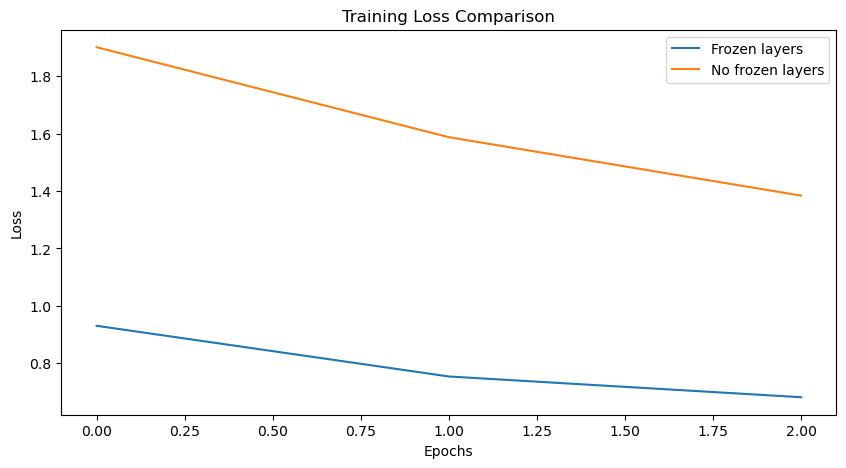

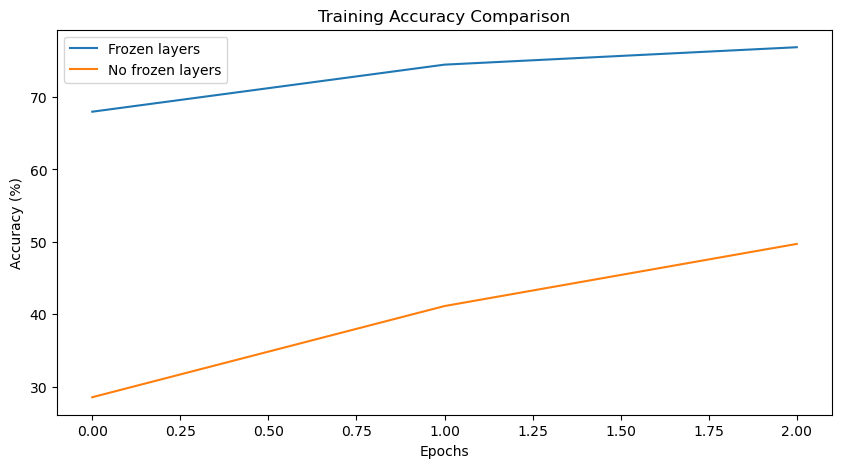

Test Accuracy with Frozen Layers: 79.97%
Test Accuracy without Frozen Layers: 55.94%


In [ ]:
# Your graphs here and please provide comment in markdown in another cell
# 现在，我们有了两个配置的损失和准确率，可以绘图比较它们的性能。
# 假设你已经有了4.1任务中的数据: train_losses_unfrozen, train_accuracies_unfrozen, test_accuracy_unfrozen
import matplotlib.pyplot as plt
# 绘制损失比较图
plt.figure(figsize=(10, 5))
plt.plot(train_losses_frozen, label='Frozen layers')
plt.plot(train_losses_unfrozen, label='No frozen layers')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 绘制准确率比较图
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies_frozen, label='Frozen layers')
plt.plot(train_accuracies_unfrozen, label='No frozen layers')
plt.title('Training Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

# 比较测试集上的准确率
print(f'Test Accuracy with Frozen Layers: {test_accuracy_frozen:.2f}%')
print(f'Test Accuracy without Frozen Layers: {test_accuracy_unfrozen:.2f}%')

### Part II: Image Captioning using RNN [30 marks]



### Motivation

Through this part of assessment you will:

> 1. Understand the principles of text pre-processing and vocabulary building (provided).
> 2. Gain experience working with an image to text model.
> 3. Use and compare text similarity metrics for evaluating an image to text model, and understand evaluation challenges.

#### Dataset
This assessment will use a subset of the [COCO "Common Objects in Context" dataset](https://cocodataset.org/) for image caption generation. COCO contains 330K images, of 80 object categories, and at least five textual reference captions per image. Our subset consists of nearly 5070 of these images, each of which has five or more different descriptions of the salient entities and activities, and we will refer to it as COCO_5070.

To download the data:

> 1. **Images and annotations**: download the zipped file provided in the link here as [``COMP5625M_data_assessment_2.zip``](https://leeds365-my.sharepoint.com/:u:/g/personal/scssali_leeds_ac_uk/EWWzE-_AIrlOkvOKxH4rjIgBF_eUx8KDJMPKM2eHwCE0dg?e=DdX62H).

``Info only:`` To understand more about the COCO dataset you can look at the [download page](https://cocodataset.org/#download). We have already provided you with the "2017 Train/Val annotations (241MB)" but our image subset consists of fewer images compared to orginial COCO dataset. So, no need to download anything from here!

> 2. **Image meta data**: as our set is a subset of full COCO dataset, we have created a CSV file containing relevant meta data for our particular subset of images. You can download it also from Drive, "coco_subset_meta.csv" at the same link as 1.

#### Submission

You can either submit the same file or make a two separate .ipython notebook files zipped in the submission (please name as ``yourstudentusername_partI.ipynb`` and ``yourstudentusername_partII.ipynb``).

**Final note:**

> **Please include in this notebook everything that you would like to be marked, including figures. Under each section, put the relevant code containing your solution. You may re-use functions you defined previously, but any new code must be in the relevant section.** Feel free to add as many code cells as you need under each section.


The basic principle of our image-to-text model is as pictured in the diagram below, where an Encoder network encodes the input image as a feature vector by providing the outputs of the last fully-connected layer of a pre-trained CNN (we use [ResNet50](https://arxiv.org/abs/1512.03385)). This pretrained network has been trained on the complete ImageNet dataset and is thus able to recognise common objects.

You can alternatively use the COCO trained pretrained weights from [PyTorch](https://pytorch.org/vision/stable/models.html). One way to do this is use the "FasterRCNN_ResNet50_FPN_V2_Weights.COCO_V1" but use e.g., "resnet_model = model.backbone.body". Alternatively, you can use the checkpoint from your previous coursework where you fine-tuned to COCO dataset.

These features are then fed into a Decoder network along with the reference captions. As the image feature dimensions are large and sparse, the Decoder network includes a linear layer which downsizes them, followed by *a batch normalisation layer to speed up training*. Those resulting features, as well as the reference text captions, are then passed into a recurrent network (we will use an **RNNs** in this assessment).

The reference captions used to compute loss are represented as numerical vectors via an **embedding layer** whose weights are learned during training.

<!-- ![Encoder Decoder](comp5625M_figure.jpg) -->

<div>
<center><img src="comp5625M_figure.jpg" width="1000"/></center>
</div>


### Instructions for creating vocabulary

A helper function file ``helperDL.py`` is provided that includes all the functions that will do the following for you. You can easily import these functions in the exercise, most are already done for you!  

> 1. Extracting image features (a trained checkpoint is provided ``resnet50_caption.pt`` for you to download and use it for training your RNN)
> 2. Text preparation of training and validation data is provided

In [1]:
import torch
import torch.nn as nn
from torchvision import transforms
import torchvision.models as models
from torch.utils.data import Dataset
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import matplotlib.pyplot as plt
from collections import Counter
import os
import numpy as np

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


**Please refer to the submission section at the top of this notebook to prepare your submission.**


In [3]:
# Load the feature map provided to you
features_map = torch.load('H:/Deep Learning/COMP5625M_data_assessment_2/resnet50_caption.pt', map_location=device)

#### 5 Train DecoderRNN [20 marks]

> 5.1 Design a RNN-based decoder (10 marks)

> 5.2 Train your model with precomputed features (10 Marks)

##### 5.1 Design a RNN-based decoder (10 marks)

Read through the ```DecoderRNN``` model below. First, complete the decoder by adding an ```rnn``` layer to the decoder where indicated, using [the PyTorch API as reference](https://pytorch.org/docs/stable/nn.html#rnn).

Keep all the default parameters except for ```batch_first```, which you may set to True.

In particular, understand the meaning of ```pack_padded_sequence()``` as used in ```forward()```. Refer to the [PyTorch ```pack_padded_sequence()``` documentation](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html).


In [4]:
import json
import pandas as pd

with open('H:/Deep Learning/COMP5625M_data_assessment_2/coco/annotations2017/captions_train2017.json', 'r') as json_file:
    data = json.load(json_file)

df = pd.DataFrame.from_dict(data["annotations"])
df.head()

,image_id,id,caption
0,203564,37,A bicycle replica with a clock as the front wh...
1,322141,49,A room with blue walls and a white sink and door.
2,16977,89,A car that seems to be parked illegally behind...
3,106140,98,A large passenger airplane flying through the ...
4,106140,101,There is a GOL plane taking off in a partly cl...


In [5]:
coco_subset = pd.read_csv("H:/Deep Learning/COMP5625M_data_assessment_2/coco_subset_meta.csv")
new_data = pd.DataFrame( data['annotations'])
new_coco = coco_subset.rename(columns={'id':'image_id'})
new_coco.drop_duplicates('file_name',keep='first',inplace=True)

new_subset = new_data.sort_values(['image_id'], ascending=True)
# Get all the reference captions
new_file = pd.merge(new_coco,new_subset,how = 'inner', on = 'image_id')
new_file = new_file[['image_id','id','caption','file_name']]
new_file = new_file.sort_values(['image_id'], ascending = True)
new_file.head(10)

,image_id,id,caption,file_name
16755,9,661611,Closeup of bins of food that include broccoli ...,000000000009.jpg
16759,9,661977,A meal is presented in brightly colored plasti...,000000000009.jpg
16758,9,663627,there are containers filled with different kin...,000000000009.jpg
16757,9,666765,"Colorful dishes holding meat, vegetables, frui...",000000000009.jpg
16756,9,667602,A bunch of trays that have different food.,000000000009.jpg
9634,25,127238,A giraffe mother with its baby in the forest.,000000000025.jpg
9633,25,127076,A giraffe standing up nearby a tree,000000000025.jpg
9635,25,133058,Two giraffes standing in a tree filled area.,000000000025.jpg
9636,25,133676,A giraffe standing next to a forest filled wit...,000000000025.jpg
9637,25,122312,A giraffe eating food from the top of the tree.,000000000025.jpg


In [6]:
# getting the clearn clean - e.g., converting all uppercases to lowercases
new_file["clean_caption"] = ""
from helperDL import gen_clean_captions_df
new_file = gen_clean_captions_df(new_file)
new_file.head(10)

,image_id,id,caption,file_name,clean_caption
16755,9,661611,Closeup of bins of food that include broccoli ...,000000000009.jpg,closeup of bins of food that include broccoli ...
16759,9,661977,A meal is presented in brightly colored plasti...,000000000009.jpg,a meal is presented in brightly colored plasti...
16758,9,663627,there are containers filled with different kin...,000000000009.jpg,there are containers filled with different kin...
16757,9,666765,"Colorful dishes holding meat, vegetables, frui...",000000000009.jpg,colorful dishes holding meat vegetables fruit ...
16756,9,667602,A bunch of trays that have different food.,000000000009.jpg,a bunch of trays that have different food
9634,25,127238,A giraffe mother with its baby in the forest.,000000000025.jpg,a giraffe mother with its baby in the forest
9633,25,127076,A giraffe standing up nearby a tree,000000000025.jpg,a giraffe standing up nearby a tree
9635,25,133058,Two giraffes standing in a tree filled area.,000000000025.jpg,two giraffes standing in a tree filled area
9636,25,133676,A giraffe standing next to a forest filled wit...,000000000025.jpg,a giraffe standing next to a forest filled wit...
9637,25,122312,A giraffe eating food from the top of the tree.,000000000025.jpg,a giraffe eating food from the top of the tree


In [7]:
##### Spilt your training, validation and test dataset with indexes to each set
from helperDL import split_ids
train_id, valid_id, test_id = split_ids(new_file['image_id'].unique())
print("training:{}, validation:{}, test:{}".format(len(train_id), len(valid_id), len(test_id)))

training:3547, validation:506, test:1015


In [8]:
train_set = new_file.loc[new_file['image_id'].isin(train_id)]
valid_set = new_file.loc[new_file['image_id'].isin(valid_id)]
test_set = new_file.loc[new_file['image_id'].isin(test_id)]

In [9]:
class Vocabulary(object):
    """ Simple vocabulary wrapper which maps every unique word to an integer ID. """
    def __init__(self):
        # intially, set both the IDs and words to dictionaries with special tokens
        self.word2idx = {'<pad>': 0, '<unk>': 1, '<end>': 2}
        self.idx2word = {0: '<pad>', 1: '<unk>', 2: '<end>'}
        self.idx = 3

    def add_word(self, word):
        # if the word does not already exist in the dictionary, add it
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word
            # increment the ID for the next word
            self.idx += 1

    def __call__(self, word):
        # if we try to access a word not in the dictionary, return the id for <unk>
        if not word in self.word2idx:
            return self.word2idx['<unk>']
        return self.word2idx[word]

    def __len__(self):
        return len(self.word2idx)

In [10]:
### build vocabulariy for each set - train, val and test
# you will be using to create dataloaders
from helperDL import build_vocab

# create a vocab instance
vocab = Vocabulary()
vocab_train = build_vocab(train_id, new_file, vocab)
vocab_valid = build_vocab(valid_id, new_file, vocab)
vocab_test = build_vocab(test_id, new_file, vocab)

vocab = vocab_train # using only training samples as vocabulary as instructed above
print("Total vocabulary size: {}".format(len(vocab_train)))


Total vocabulary size: 2346


In [11]:
# They can also join the train and valid captions but they will need to run vocabulary after concatenation
import numpy as np
vocab = build_vocab(np.concatenate((train_id, valid_id), axis=0), new_file, vocab) #---> overrighting
len(vocab)

2500

Instantiate a ```DataLoader``` for your image feature and caption dataset. ``helperDL.py`` file includes all the required functions

We need to overwrite the default PyTorch collate_fn() because our
ground truth captions are sequential data of varying lengths. The default
collate_fn() does not support merging the captions with padding.

You can read more about it here:
https://pytorch.org/docs/stable/data.html#dataloader-collate-fn.


In [12]:
from helperDL import EncoderCNN
model = EncoderCNN()
print(model)

EncoderCNN(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64

In [ ]:
''' Load the saved image feature maps and trained model ("provided to you") '''

# ---> your entry here (make sure that the path is correct)
#features = torch.load("H:/Deep Learning/COMP5625M_data_assessment_2/resnet50_caption.pt")

# also load the model ckpt and udate the model state dict of the base model
# ---> your entry here (make sure that the path is correct)
#checkpoint = torch.load("H:/Deep Learning/COMP5625M_data_assessment_2/resnet50_caption.pt")
#model.load_state_dict(checkpoint['model_state_dict'])

In [13]:
##### Preparing the train, val and test dataloaders
from helperDL import COCO_Features
from helperDL import caption_collate_fn


# Create a dataloader for train
dataset_train = COCO_Features(
    df=train_set,
    vocab=vocab,
    features=features_map,
)

train_loader = torch.utils.data.DataLoader(
    dataset_train,
    batch_size=32,
    shuffle=True,
    num_workers=0, # may need to set to 0
    collate_fn=caption_collate_fn, # explicitly overwrite the collate_fn
)

# Create a dataloader for valid
dataset_valid = COCO_Features(
    df=valid_set,
    vocab=vocab,
    features=features_map,
)

valid_loader = torch.utils.data.DataLoader(
    dataset_valid,
    batch_size=32,
    shuffle=True,
    num_workers=0, # may need to set to 0
    collate_fn=caption_collate_fn, # explicitly overwrite the collate_fn
)

In [ ]:
# say this is as below
# --> Please change these numbers as required.
# --> Please comment on changes that you do.
EMBED_SIZE = 256
HIDDEN_SIZE = 512
NUM_LAYERS = 1
LR = 0.001
NUM_EPOCHS = 5
LOG_STEP = 10
MAX_SEQ_LEN = 37

##New

In [14]:
# say this is as below
# --> Please change these numbers as required.
# --> Please comment on changes that you do.
EMBED_SIZE = 256
HIDDEN_SIZE = 512
NUM_LAYERS = 1
LR = 0.0005
NUM_EPOCHS = 5
LOG_STEP = 10
MAX_SEQ_LEN = 37

1. EMBED_SIZE（嵌入大小）:
依据：文本数据的复杂性和多样性。较大的嵌入尺寸可以捕获更丰富的语义信息，但可能会增加模型的计算负担和过拟合风险。
修改原则：如果你发现模型性能不佳且疑似因为嵌入层无法充分捕获词汇的复杂性，可以尝试增加嵌入大小。
2. HIDDEN_SIZE（隐藏层大小）:
依据：模型需要捕获的信息量和数据集的大小。较大的隐藏层尺寸允许模型学习更复杂的特征，但也会增加模型的计算需求和过拟合的可能性。
修改原则：如果模型过拟合，考虑减小隐藏层大小；如果模型欠拟合，可以尝试增加隐藏层大小。
3. NUM_LAYERS（层数）:
依据：模型的复杂度需求。更多的层数可以提高模型的学习能力，但也增加了训练难度和过拟合的风险。
修改原则：开始时使用较少的层数，如果发现增加层数可以改善模型性能，则逐渐增加。
4. LR（学习率）:
依据：模型训练的稳定性和速度。过高的学习率可能导致训练不稳定，过低的学习率会导致训练速度缓慢。
修改原则：使用诸如学习率衰减策略，或者开始时使用较高的学习率，随后根据训练进度逐步减小学习率。
5. NUM_EPOCHS（训练周期）:
依据：数据集的大小和模型的收敛速度。较大的数据集或较复杂的模型可能需要更多的训练周期。
修改原则：监控验证集的性能来判断是否需要更多的训练周期。使用早停（early stopping）来避免过拟合。
6. LOG_STEP（日志步骤）:
依据：个人偏好和训练集的大小。这个参数影响的是训练过程中信息记录的频率，并不直接影响模型性能。
修改原则：根据需要调整，以便更好地监控训练过程。
7. MAX_SEQ_LEN（最大序列长度）:
依据：文本数据的长度分布。需要足够长的序列长度来包含大部分或所有的训练样本，同时避免过多的填充。
修改原则：根据数据集中句子长度的分布进行调整，以平衡模型性能和计算效率。

#### 5.1 Design a RNN-based decoder (10 marks)

Read through the ```DecoderRNN``` model below. First, complete the decoder by adding an ```rnn``` layer to the decoder where indicated, using [the PyTorch API as reference](https://pytorch.org/docs/stable/nn.html#rnn).

Keep all the default parameters except for ```batch_first```, which you may set to True.

In particular, understand the meaning of ```pack_padded_sequence()``` as used in ```forward()```. Refer to the [PyTorch ```pack_padded_sequence()``` documentation](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html).

In [15]:
class DecoderRNN(nn.Module):
    def __init__(self, vocab_size, embed_size=256, hidden_size=512, num_layers=1, max_seq_length=47):
        """Set the hyper-parameters and build the layers."""
        super(DecoderRNN, self).__init__()

        # we want a specific output size, which is the size of our embedding, so
        # we feed our extracted features from the last fc layer (dimensions 1 x 2048)
        # into a Linear layer to resize
        # your code
        self.resize = nn.Linear(2048, embed_size) #特征向量大小
        # batch normalisation helps to speed up training
        self.bn = nn.BatchNorm1d(embed_size, momentum=0.01)

        # your code
        # your code for embedding layer
        self.embed = nn.Embedding(vocab_size, embed_size)

        # your code for RNN
        self.rnn = nn.LSTM(embed_size, hidden_size, num_layers, batch_first = True)

        self.linear = nn.Linear(hidden_size, vocab_size)
        self.max_seq_length = max_seq_length


    def forward(self, features, captions, lengths):
        """Decode image feature vectors and generates captions."""
        embeddings = self.embed(captions)
        im_features = self.resize(features)
        im_features = self.bn(im_features)

        # compute your feature embeddings
        # your code
        embeddings = torch.cat((im_features.unsqueeze(1), embeddings), 1)

        # pack_padded_sequence returns a PackedSequence object, which contains two items:
        # the packed data (data cut off at its true length and flattened into one list), and
        # the batch_sizes, or the number of elements at each sequence step in the batch.
        # For instance, given data [a, b, c] and [x] the PackedSequence would contain data
        # [a, x, b, c] with batch_sizes=[2,1,1].

        # your code [hint: use pack_padded_sequence]
        packed = pack_padded_sequence(embeddings, lengths, batch_first = True, enforce_sorted = False)

        hiddens, _ = self.rnn(packed)
        outputs = self.linear(hiddens[0]) #hint: use a hidden layers in parenthesis
        return outputs


    def sample(self, features, states=None):
        """Generate captions for given image features using greedy search."""
        sampled_ids = []

        inputs = self.bn(self.resize(features)).unsqueeze(1)
        for i in range(self.max_seq_length):
            hiddens, states = self.rnn(inputs, states)  # hiddens: (batch_size, 1, hidden_size)
            outputs = self.linear(hiddens.squeeze(1))   # outputs:  (batch_size, vocab_size)
            _, predicted = outputs.max(1)               # predicted: (batch_size)
            sampled_ids.append(predicted)
            inputs = self.embed(predicted)              # inputs: (batch_size, embed_size)
            inputs = inputs.unsqueeze(1)                # inputs: (batch_size, 1, embed_size)
        sampled_ids = torch.stack(sampled_ids, 1)       # sampled_ids: (batch_size, max_seq_length)
        return sampled_ids


In [16]:
# instantiate decoder
decoder = DecoderRNN(len(vocab), embed_size=EMBED_SIZE, hidden_size=HIDDEN_SIZE, num_layers=NUM_LAYERS).to(device)

##### 5.2 Train your model with precomputed features (10 marks)

Train the decoder by passing the features, reference captions, and targets to the decoder, then computing loss based on the outputs and the targets. Note that when passing the targets and model outputs to the loss function, the targets will also need to be formatted using ```pack_padded_sequence()```.

We recommend a batch size of around 64 (though feel free to adjust as necessary for your hardware).

**We strongly recommend saving a checkpoint of your trained model after training so you don't need to re-train multiple times.**

Display a graph of training and validation loss over epochs to justify your stopping point.

In [ ]:
from tqdm import tqdm
import numpy as np
import torch
from torch.nn.utils.rnn import pack_padded_sequence

# loss and optimizer here
# your code here --->
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(decoder.parameters(), lr = LR)

#初始化
train_losses = []
valid_losses = []

# train the models
total_step = len(train_loader)
total_step_v = len(valid_loader)
stats = np.zeros((NUM_EPOCHS,2))
print(stats.shape)

#stats = np.zeros((NUM_EPOCHS, 2))


for epoch in range(NUM_EPOCHS):
  total_loss = 0
  with tqdm(total=total_step, desc=f"Epoch {epoch+1}") as pbar:
    for i, (features_, captions_, lengths_) in enumerate(train_loader):
      # your code here --->
      features_ = features_.to(device)
      captions_ = captions_.to(device)
      targets = pack_padded_sequence(captions_, lengths_, batch_first = True, enforce_sorted = False)[0]

      #前向传播
      outputs = decoder(features_, captions_, lengths_)
      loss = criterion(outputs, targets)

      #后向传播和优化
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      total_loss += loss.item()

      # 更新进度条
      pbar.update(1)

      # 设置进度条的后缀，以显示当前损失值
      pbar.set_postfix(loss=loss.item())

    # 每个epoch结束后记录平均训练损失
    stats[epoch,0] = round(total_loss/total_step,3)

      # print stats
      #if i % LOG_STEP == 0:
          #pbar.set_postfix(Loss=loss.item())
          #print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Step [{i}/{total_step}], Loss: {loss.item():.4f}")


  #验证阶段
  total_loss = 0
  with tqdm(total=total_step_v, desc=f"Epoch {epoch+1} Validation") as pbar:
    decoder.eval()
    with torch.no_grad():
      for i, (features_, captions_, lengths_) in enumerate(valid_loader):
        # your code here --->
        features_ = features_.to(device)
        captions_ = captions_.to(device)

        outputs = decoder(features_, captions_, lengths_)
        targets = pack_padded_sequence(captions_, lengths_, batch_first = True)[0]
        loss = criterion(outputs, targets)

        total_loss += loss.item()

        # 更新进度条
        pbar.update(1)

    # 每个epoch结束后记录平均验证损失
    stats[epoch,1] = round(total_loss/total_step_v,3)
    decoder.train()# 确保下一个epoch在训练模式下开始

  # print stats
  print("="*30)
  print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Train_Loss: {stats[epoch,0]}, Valid_Loss: {stats[epoch,1]}")
  print("="*30)

(5, 2)


Epoch 1 Validation: 100%|██████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 78.46it/s]


Epoch [1/5], Train_Loss: 4.191, Valid_Loss: 3.566


Epoch 2 Validation: 100%|██████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 77.85it/s]


Epoch [2/5], Train_Loss: 3.235, Valid_Loss: 3.17


Epoch 3 Validation: 100%|██████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 78.51it/s]


Epoch [3/5], Train_Loss: 2.868, Valid_Loss: 2.967


Epoch 4 Validation: 100%|██████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 75.51it/s]


Epoch [4/5], Train_Loss: 2.619, Valid_Loss: 2.878


Epoch 5 Validation: 100%|██████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 78.24it/s]

Epoch [5/5], Train_Loss: 2.425, Valid_Loss: 2.836


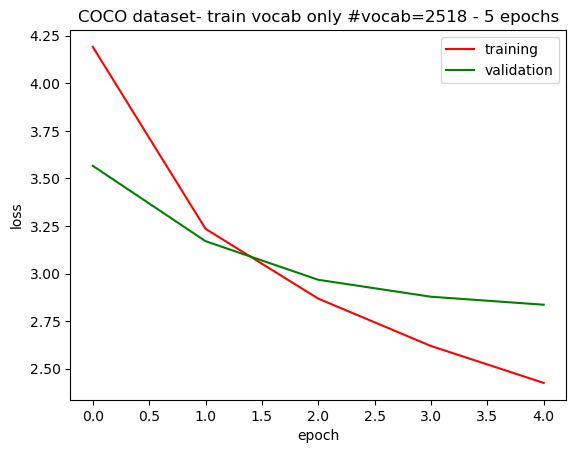

In [ ]:
fig = plt.figure()

plt.plot(stats[:,0], 'r', label = 'training', )
plt.plot(stats[:,1], 'g', label = 'validation' )
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title(f"COCO dataset- train vocab only #vocab={len(vocab)} - 5 epochs")
fig.savefig("coco_train_vocab_only.png")
plt.show()

In [ ]:
# save model after training
decoder_ckpt = torch.save(decoder, "H:/Deep Learning/COMP5625M_data_assessment_2/Save_Model/coco_subset_assessment_decoder_2.ckpt")

### 6 Test prediction and evaluation [10 marks]

#### 6.1 Generate predictions on test data (4 marks)

Display 4 sample test images containing different objects, along with your model’s generated captions and all the reference captions for each.

> Remember that everything **displayed** in the submitted notebook and .html file will be marked, so be sure to run all relevant cells.

In [37]:
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import os

# 假设 test_set 已经定义，并包含了您的测试数据

class COCOImagesDataset(Dataset):
    def __init__(self, df, root_dir, transform=None):
        self.df = df
        self.root_dir = root_dir
        self.transform = transform

    def __getitem__(self, index):
        img_name = os.path.join(self.root_dir, self.df.iloc[index]['file_name'])
        image = Image.open(img_name).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, self.df.iloc[index]['file_name']

    def __len__(self):
        return len(self.df)

# 定义图像变换
data_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# 使用您提供的图像目录路径作为 root_dir 参数
image_directory = "H:/Deep Learning/COMP5625M_data_assessment_2/coco/images/"

dataset_test = COCOImagesDataset(df=test_set, root_dir=image_directory, transform=data_transform)
test_loader = DataLoader(dataset_test, batch_size=32, shuffle=True, num_workers=0)

# 现在，test_loader 已经准备好被用于遍历和处理图像数据

In [38]:
model.eval()
decoder.eval() # generate caption, eval mode to not influence batchnormncoder.eval()

DecoderRNN(
  (resize): Linear(in_features=2048, out_features=256, bias=True)
  (bn): BatchNorm1d(256, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
  (embed): Embedding(2500, 256)
  (rnn): LSTM(256, 512, batch_first=True)
  (linear): Linear(in_features=512, out_features=2500, bias=True)
)

In [36]:
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

# 假设 test_set 已经被定义为包含图像文件名的DataFrame
# 假设 vocab 和 features_map 是之前定义的，但在这个场景中不会用到它们



class COCOImagesDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.root_dir = root_dir  # 正确添加 root_dir 参数
        self.transform = transform

    def __getitem__(self, index):
        img_path = self.df.iloc[index]['file_name']  # 获取图像路径
        image = Image.open(img_path).convert('RGB')  # 加载图像
        if self.transform:
            image = self.transform(image)  # 应用变换
        return image, self.df.iloc[index]['file_name']

    def __len__(self):
        return len(self.df)

In [39]:
# getting functions from helperDL.py
from helperDL import timshow
from helperDL import decode_caption

GENERATED: 
directly plants cutter tall sale typing framed striped bathtub great fixing platter skier putting opened rainy streets no down hung uniformed amongst bar designed birthday first decker made bu... sheets subway flowers pedestrians blankets shown reflection refri... dogs sleeping rack museum laptop wa... made rack controllers wading

REFERENCES:
a large kitchen with wood floors and cabinets
a kitchen with a lot of cupboards and a ceiling fan
a kitchen that is neatly organized with kitchen decor
a white stove top oven sitting in a kitchen
a very orderly looking kitchen that has a wood grain finish



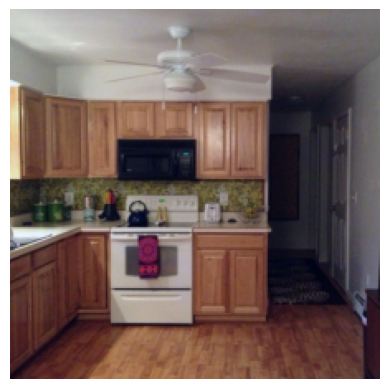

GENERATED: 
d... military arena track basket it rolls row row makes eaten small town toddler quilt hay grass hamburger club pai... lar... three event cricket covering flowers streets pa... sushi down hung uniformed amongst bar designed birthday motor clothing checking laptop... loaded located located located enjoys hamburger su...

REFERENCES:
a giraffe standing on top of a grass covered field
a giraffe is standing in the grass land
the giraffe is standing in an open field
a giraffe standing in front of trees and an open field
a close up of a giraffe with trees in the background



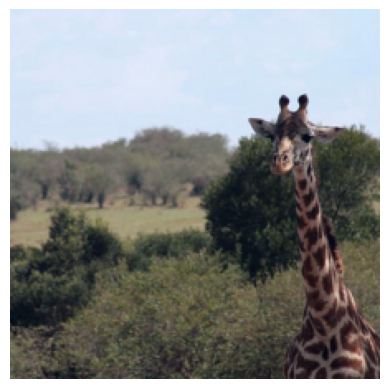

GENERATED: 
grey ska... meters hose course clothing checking toot... pictures sets knife worn shop bat... bu... puppy babies crosses opening opening wildebeest balanced end end onions onions crib microwave oth... gla... outdoor outdoor station attempting arm floral boats low dress landing leather ribbon flat tennis... furnished pastry objects

REFERENCES:
a cake on a cake pedestal sitting on a counter
a white cake sitting on top of a green cake plate
cake iced sitting on top of cake stand with bowl next to it
a cake is kept on a stand and some fruits in a bowl
a cake with frosting sitting on a pedestal



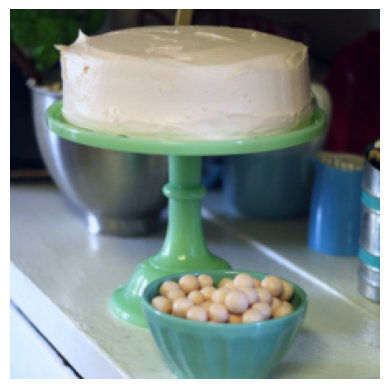

GENERATED: 
kite behind clean_caption, bathtub ribbon jet jet off blowing chewing chewing chewing their smaller v... middle... streets surface can meats that lid wit... show poses poses lavender smile more game toppings mirrors floor appl... umb... bedspread skier sheep chefs appl... umb... cricket fire up... habitat an one

REFERENCES:
a woman in a white top is talking on a cellphone
a woman sits on a bench talking on a cell phone
a woman sitting on a bench while talking on a cell phone
a woman is sitting down talking on the phone
a beautiful young woman sitting on a plan potter



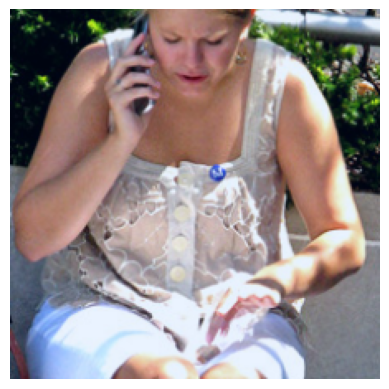

In [40]:
IMAGES_TO_SHOW = 4
idx = 0
with torch.no_grad():
    for i, (image,filename) in enumerate(test_loader):
      # your code here --->
      if idx >= IMAGES_TO_SHOW:
        break

      features = features_map[filename[0]].to(device).unsqueeze(0)  # 添加批次维度
      sampled_ids = decoder.sample(features)
      sampled_ids = sampled_ids.cpu().numpy()

      # 确保 sampled_ids 是一维数组，且正确处理为整数序列
      sampled_ids = np.squeeze(sampled_ids)  # 去除单维度
      generated_caption = ' '.join([vocab.idx2word[word_id.item()] for word_id in sampled_ids if word_id.item() in vocab.idx2word])
      print(f"GENERATED: \n{generated_caption}\n")

      #print(f"GENERATED: \n")

      #reference_captions = test_set[test_set['file_name'] == filename[0]]['caption'].tolist()clean_caption
      reference_captions = test_set[test_set['file_name'] == filename[0]]['clean_caption'].tolist()
      print("REFERENCES:")

      for ref_cap in reference_captions:
        print(ref_cap)

      print("===================================\n")


      timshow(image[0].cpu())
      idx +=1
      if idx == IMAGES_TO_SHOW:
          break

GENERATED: 
directly branch pears pears holding... bar bro... goat dugout skate... no sausages nap charging purple purple club hills pai... passengers sur... small what lunch tools toys more ship tray event small town swimming over six smelling refrigerator carrot among heels guard had green... guy cones ea... figure

REFERENCES:
a pasta dish with sides of green beans and oranges
a couple of different foods laying out on a wood table
three dishes containing pasta green beans and oranges
small bowls of food on a table
a bowl of pasta and some fruit and veggies



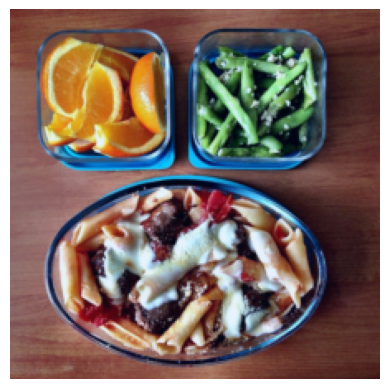

GENERATED: 
hay hamburger attempting bir... vari... potato claim daylight batters has batters happy graffiti cloth clean_caption, bathtub great pigeons coin coin teddy following solar dressed white... objects much skateboarders ride ride ride cake cake interior stop airplanes pickup platter burrito calves with huge shape church bears pa... open

REFERENCES:
a dog runs down the beach after people
a white dog is walking on the gray beach
some people houses a white dog and a surfer
a small white dog sitting on a beach next to houses
a dog watches people walking on the beach



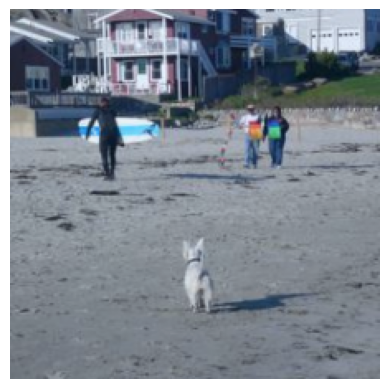

GENERATED: 
hold... white... tile type it... lined outdoors style bathro... beside habitat covered... tennis patio snowboarding gre... wide lime court multiple seats rain bears pa... wooden... hotdogs bathtub m engine railway parki... long bac... ornate tall grass blonde blonde small stage talk ot... leaps skate... no sausages nap

REFERENCES:
a person on a surfboard in the water
a young man standing on a skateboard riding a wave
the man is surfing on a small wave
a man on a surfboard in the ocean
a person in a wetsuit rides the waves with a surfboard



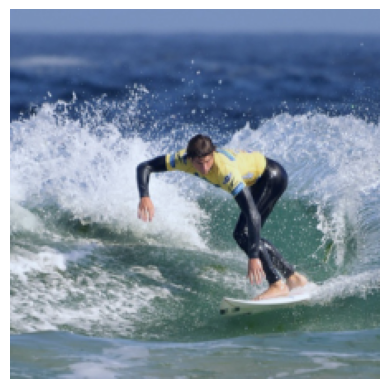

GENERATED: 
d... stares potatoes leaning fashioned blonde blonde ot... motorized cheesecake pastries barrier gla... passengers basic first first decker subway subway shower flowers look amongst along coin it she pastries babies opened sausages nap charging purple purple club hills pai... passengers sur... small what lunch tools toys more

REFERENCES:
one pink truck and a yellow car meeting in the desert
a food truck and small suv at the site of a remote roadway
a pink truck and a yellow car sit parked in the country
the two vehicles are stopped at the stop sign
a pink truck and yellow car are parked on a road



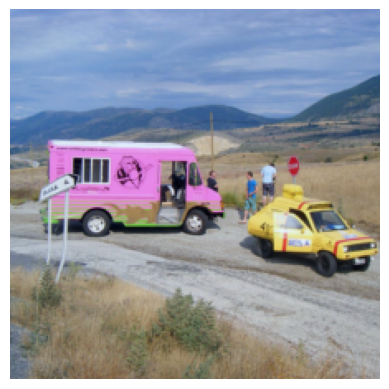

In [64]:
IMAGES_TO_SHOW = 4
idx = 0
generated_captions_list = []
reference_captions_list = []  # 新增列表来存储参考字幕

with torch.no_grad():
    for i, (image,filename) in enumerate(test_loader):
      # your code here --->
      if idx >= IMAGES_TO_SHOW:
        break

      features = features_map[filename[0]].to(device).unsqueeze(0)  # 添加批次维度
      sampled_ids = decoder.sample(features)
      sampled_ids = sampled_ids.cpu().numpy()

      # 确保 sampled_ids 是一维数组，且正确处理为整数序列
      sampled_ids = np.squeeze(sampled_ids)  # 去除单维度
      generated_caption = ' '.join([vocab.idx2word[word_id.item()] for word_id in sampled_ids if word_id.item() in vocab.idx2word])
      generated_captions_list.append(generated_caption)  # 存储生成的字幕

      print(f"GENERATED: \n{generated_caption}\n")

      #print(f"GENERATED: \n")

      #reference_captions = test_set[test_set['file_name'] == filename[0]]['caption'].tolist()clean_caption
      reference_captions = test_set[test_set['file_name'] == filename[0]]['clean_caption'].tolist()
      reference_captions_list.append(reference_captions)  # 存储参考字幕
      print("REFERENCES:")

      for ref_cap in reference_captions:
        print(ref_cap)

      print("===================================\n")


      timshow(image[0].cpu())
      idx +=1
      if idx == IMAGES_TO_SHOW:
          break

In [65]:
print(f"Generated captions count: {len(generated_captions_list)}")
print(f"Reference captions count: {len(reference_captions_list)}")

Generated captions count: 4
Reference captions count: 4


#### 6.2 Caption evaluation using cosine similarity (6 marks)

The cosine similarity measures the cosine of the angle between two vectors in n-dimensional space. The smaller the angle, the greater the similarity.

To use the cosine similarity to measure the similarity between the generated caption and the reference captions:

* Find the embedding vector of each word in the caption
* Compute the average vector for each caption
* Compute the cosine similarity score between the average vector of the generated caption and average vector of each reference caption
* Compute the average of these scores

Calculate the cosine similarity using the model's predictions over the whole test set.

Display a histogram of the distribution of scores over the test set.

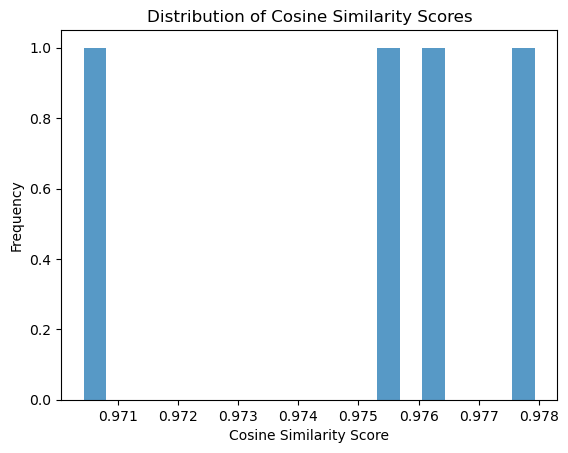

In [66]:
# your code here
from sklearn.metrics.pairwise import cosine_similarity
import torch
import numpy as np
import matplotlib.pyplot as plt

# 假设 vocab 已经创建，并且您有一个简单的嵌入矩阵（这里使用随机初始化代替）
embedding_matrix = torch.rand(len(vocab), 300)  # 假设嵌入维度为300

def get_word_embedding(word):
    if word in vocab.word2idx:
        idx = vocab(word)
        return embedding_matrix[idx].numpy()
    else:
        return np.zeros(300)  # 对于未知词返回零向量

def compute_average_vector(words):
    embeddings = np.array([get_word_embedding(word) for word in words.split()])
    if embeddings.size == 0:
        return np.zeros(300)
    return embeddings.mean(axis=0)

cosine_scores = []

for i in range(len(generated_captions_list)):
    generated_caption = generated_captions_list[i]
    reference_captions = reference_captions_list[i]

    generated_vec = compute_average_vector(generated_caption)
    reference_vecs = [compute_average_vector(caption) for caption in reference_captions]

    scores = [cosine_similarity([generated_vec], [ref_vec])[0][0] for ref_vec in reference_vecs]
    cosine_scores.append(np.mean(scores))

# 展示得分的分布直方图
plt.hist(cosine_scores, bins=20, alpha=0.75)
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Cosine Similarity Scores')
plt.show()


##### Thank you for completing the assessment - if you have any question, please ask on teams channel or attend lab sessions on Tuesdays and Wednesdays.